# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [314]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [317]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [320]:
# 한글 표시를 위한 라이브러리 설치
#!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [324]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [328]:
# 파일 불러오기
apart = joblib.load(path+'base_data1_현종.pkl')

#### 2) 기본 정보 조회

In [331]:
# 열 이름 변경
apart.rename({'총면적 합': '총면적합'}, inplace=True)

# 결과 출력
print(apart)

      단지코드  총세대수    지역  준공연도 건물형태    난방방식 승강기설치여부  실차량수         총면적  면적10_30  \
0    C0001    78    서울  2013  계단식  개별가스난방  전체동 설치   109   6023.7683        0   
1    C0002    35    서울  2013  복도식  개별가스난방  전체동 설치    35   1569.1668       35   
2    C0003    88    서울  2013  계단식  개별가스난방  전체동 설치    88   7180.1396        0   
3    C0004   477    서울  2014  복도식    지역난방  전체동 설치   943  47058.9273        0   
4    C0006    15    서울  2013  복도식  개별가스난방  전체동 설치    21    543.0268       15   
..     ...   ...   ...   ...  ...     ...     ...   ...         ...      ...   
340  C0354  1485  대전충남  1993  복도식    중앙난방  전체동 설치   298  64622.2500     1181   
341  C1354  1386  대전충남  1993  복도식  중앙가스난방  전체동 설치   258  57616.8100     1071   
342  C0356   956    경기  1994  복도식  지역가스난방  전체동 설치   243  37398.7200      956   
343  C0358   120    강원  2020  복도식  개별가스난방  전체동 설치    47   5581.8024       66   
344  C0359   447  대구경북  1994  복도식  중앙유류난방  전체동 설치    78  19383.4100      149   

     면적30_40  면적40_50  면적50_60  면적60_70

In [333]:
apart


,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,C0354,1485,대전충남,1993,복도식,중앙난방,전체동 설치,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙가스난방,전체동 설치,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역가스난방,전체동 설치,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별가스난방,전체동 설치,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [336]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [338]:
apart.info()


<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총세대수      345 non-null    int64  
 2   지역        345 non-null    object 
 3   준공연도      345 non-null    object 
 4   건물형태      345 non-null    object 
 5   난방방식      345 non-null    object 
 6   승강기설치여부   345 non-null    object 
 7   실차량수      345 non-null    int64  
 8   총면적       345 non-null    float64
 9   면적10_30   345 non-null    int64  
 10  면적30_40   345 non-null    int64  
 11  면적40_50   345 non-null    int64  
 12  면적50_60   345 non-null    int64  
 13  면적60_70   345 non-null    int64  
 14  면적70_80   345 non-null    int64  
 15  면적80_200  345 non-null    int64  
 16  임대보증금     345 non-null    float64
 17  임대료       345 non-null    float64
dtypes: float64(3), int64(9), object(6)
memory usage: 51.2+ KB


In [340]:
apart.describe()

,총세대수,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,555.431884,37282.661962,45.837681,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,374.640474,29588.197927,161.133746,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

--- 실차량수의 기술 통계 ---
count     345.000000
mean      555.431884
std       374.640474
min        21.000000
25%       258.000000
50%       498.000000
75%       822.000000
max      1657.000000
Name: 실차량수, dtype: float64


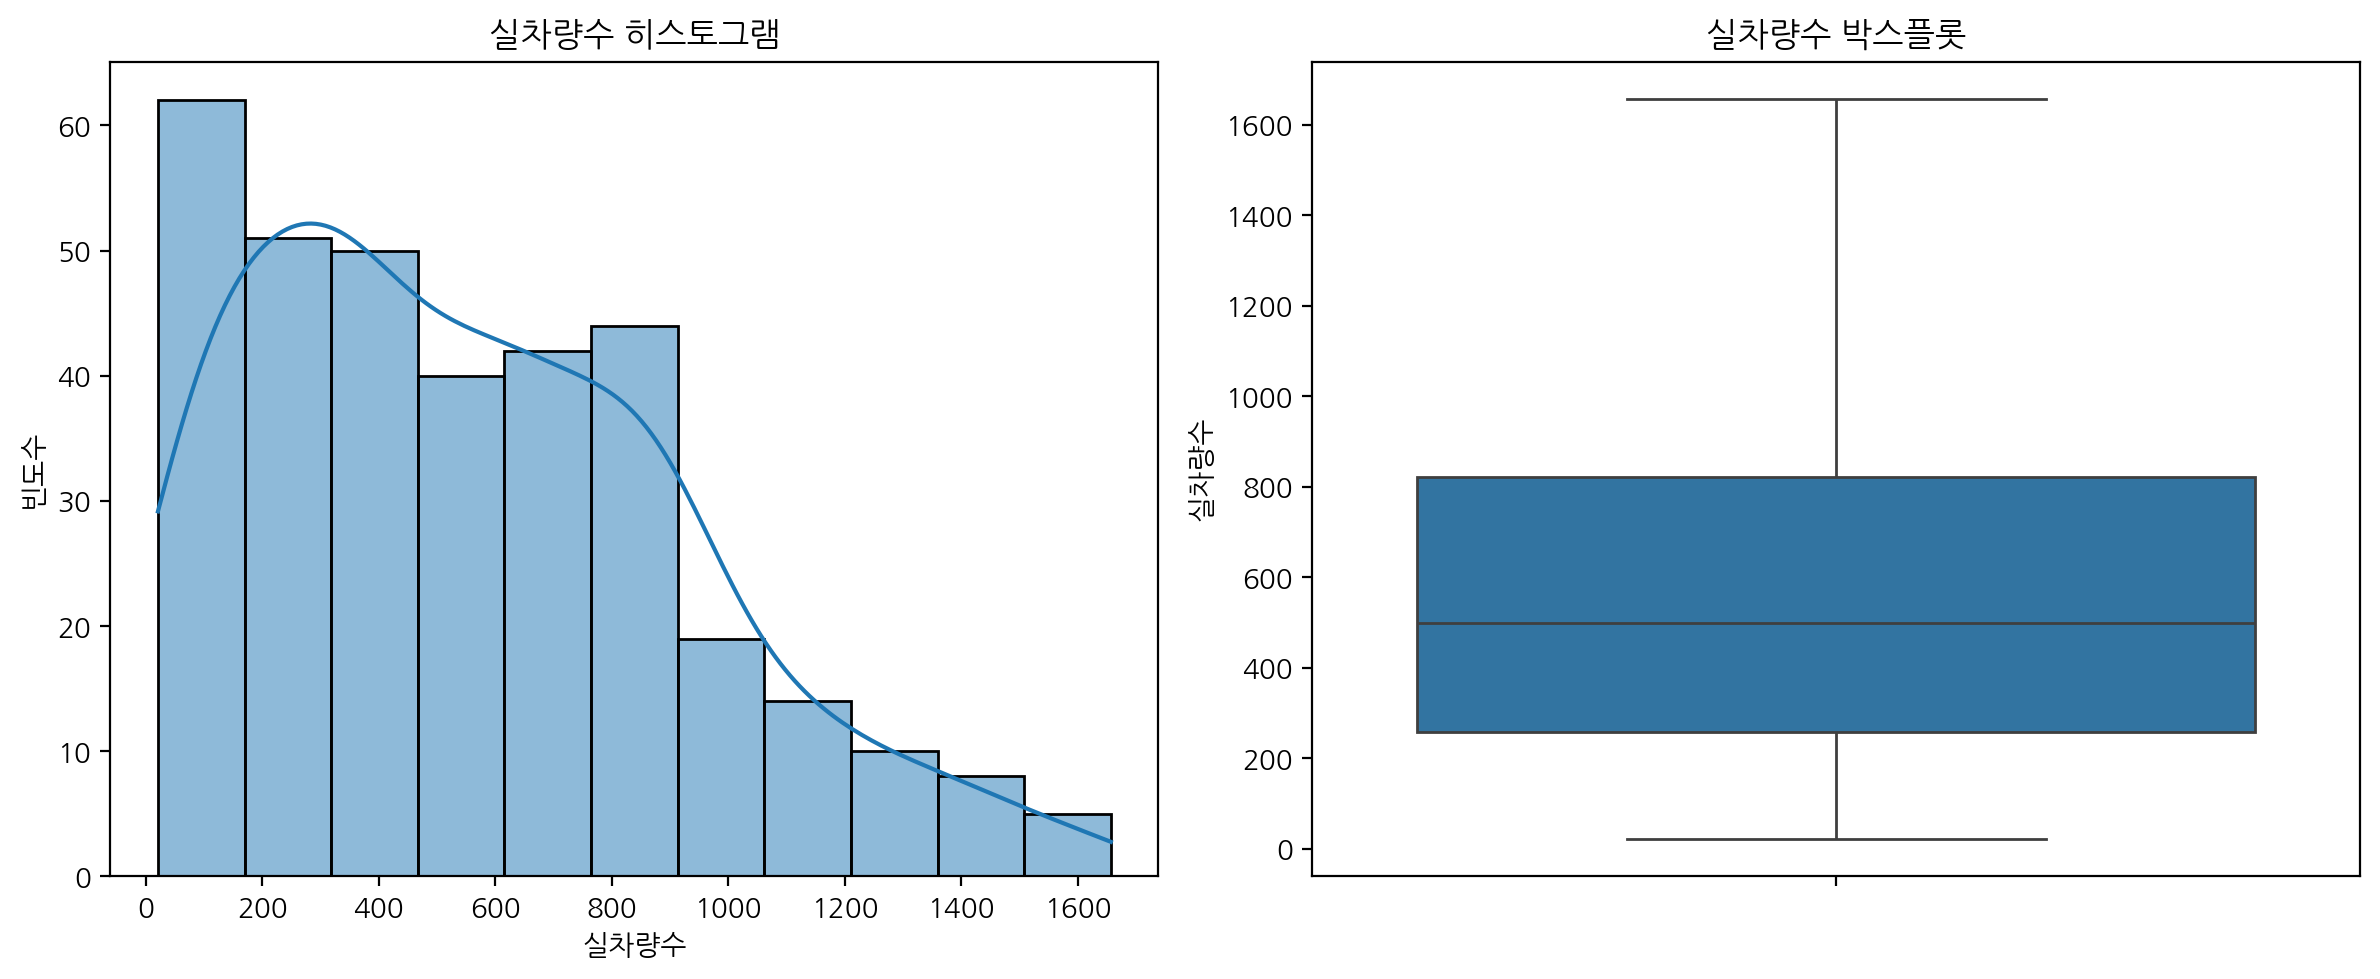

--- 총세대수의 기술 통계 ---
count     345.000000
mean      546.759420
std       432.359538
min         1.000000
25%       178.000000
50%       491.000000
75%       853.000000
max      2289.000000
Name: 총세대수, dtype: float64


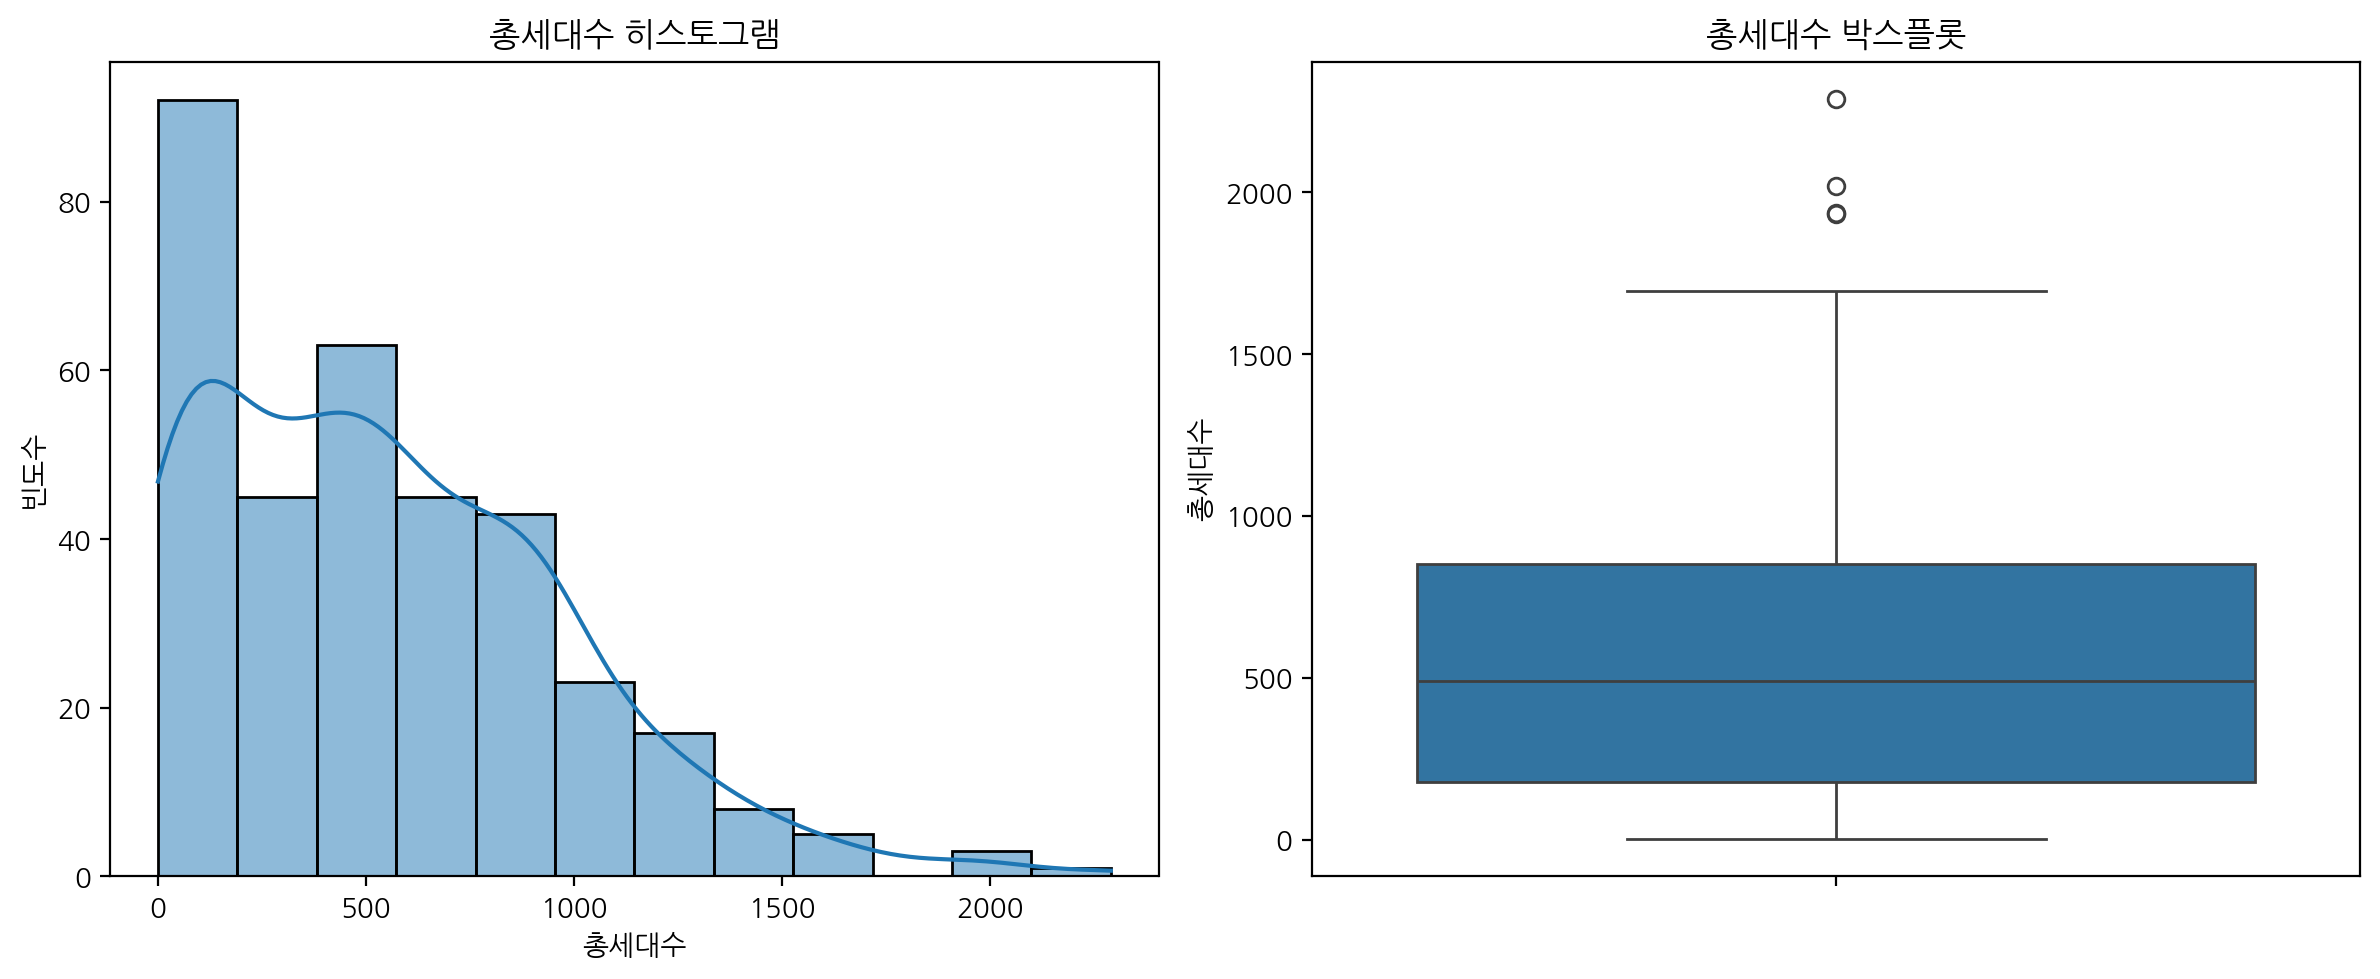

--- 총면적의 기술 통계 ---
count       345.000000
mean      37282.661962
std       29588.197927
min          68.930000
25%       11293.832100
50%       32190.360000
75%       56189.979600
max      150126.863200
Name: 총면적, dtype: float64


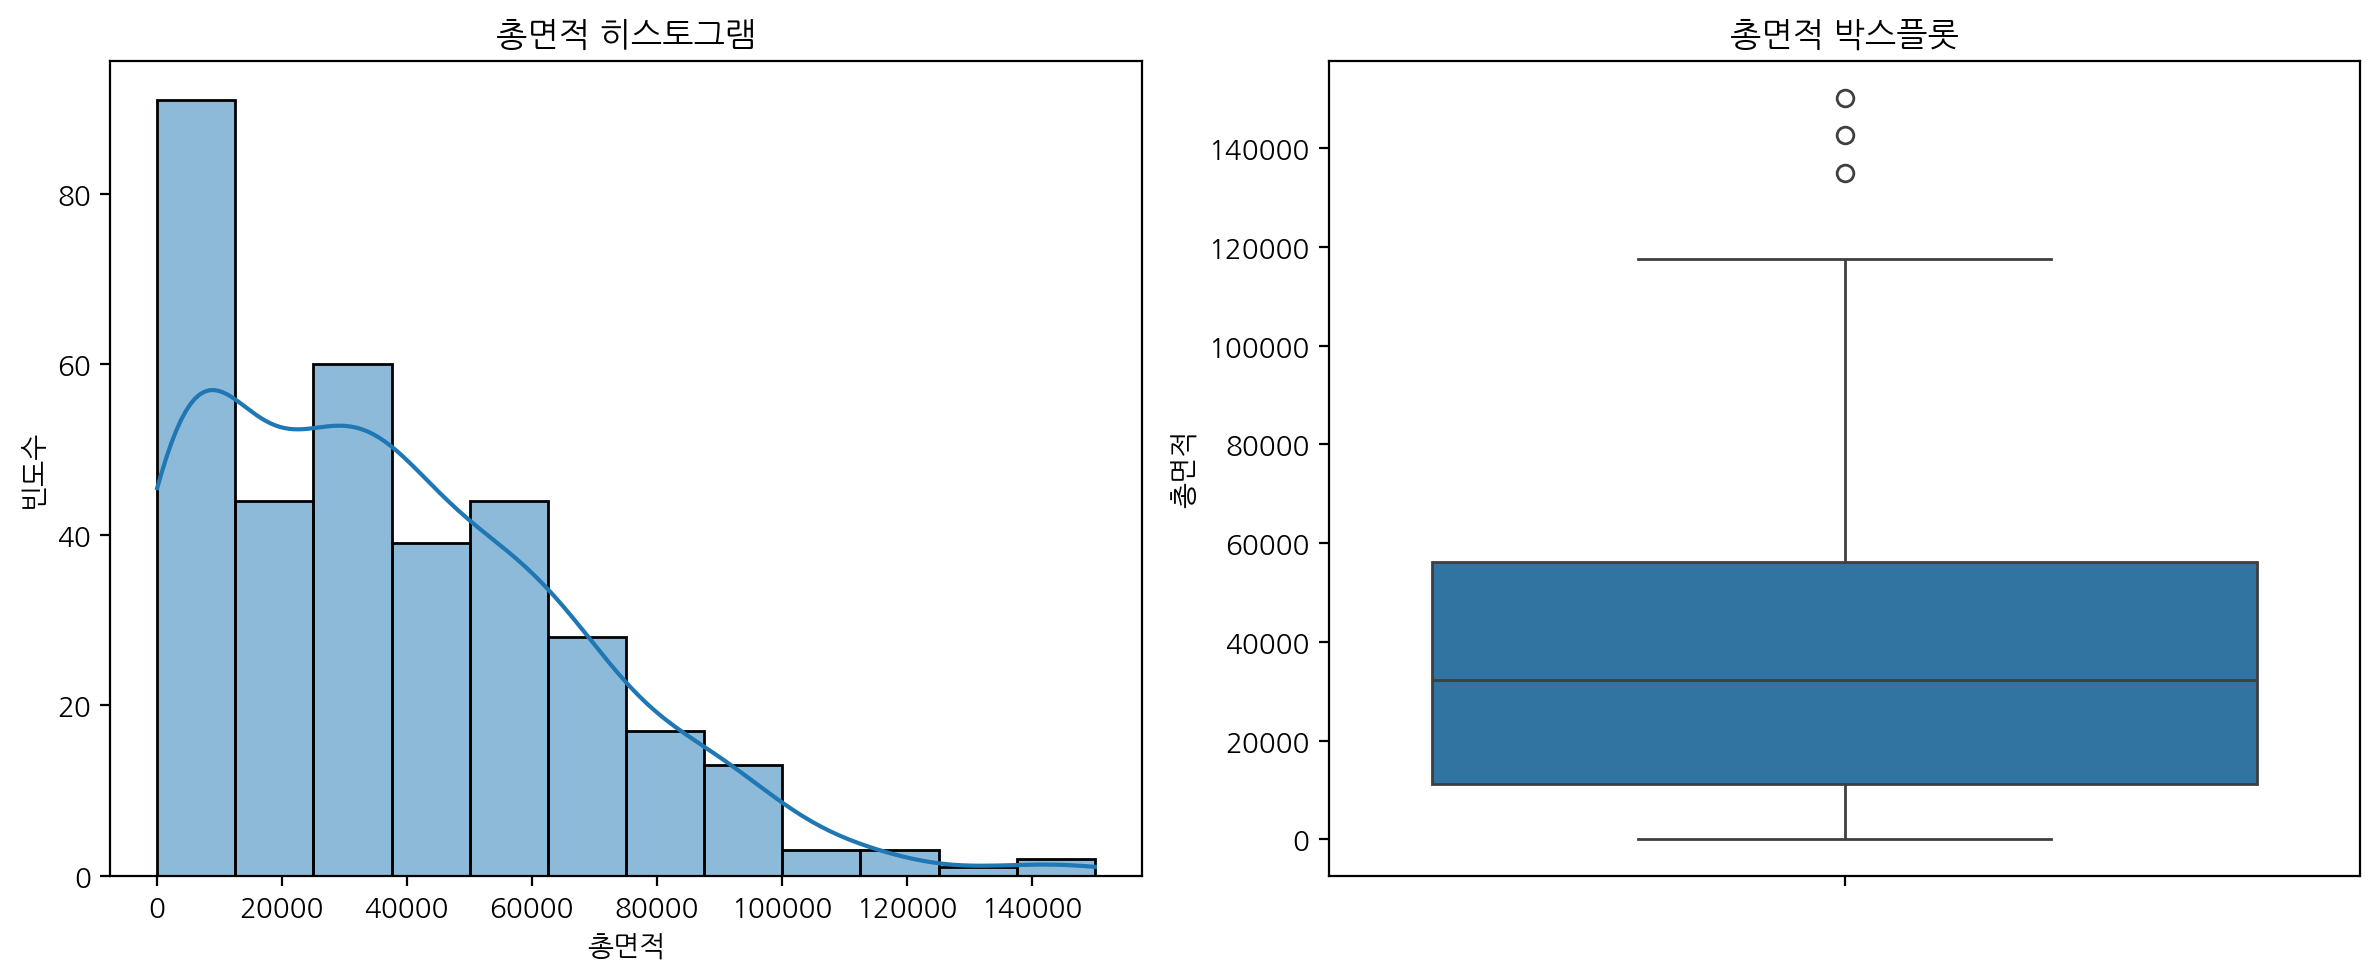

--- 준공연도의 기술 통계 ---
count      345
unique      31
top       2007
freq        24
Name: 준공연도, dtype: object


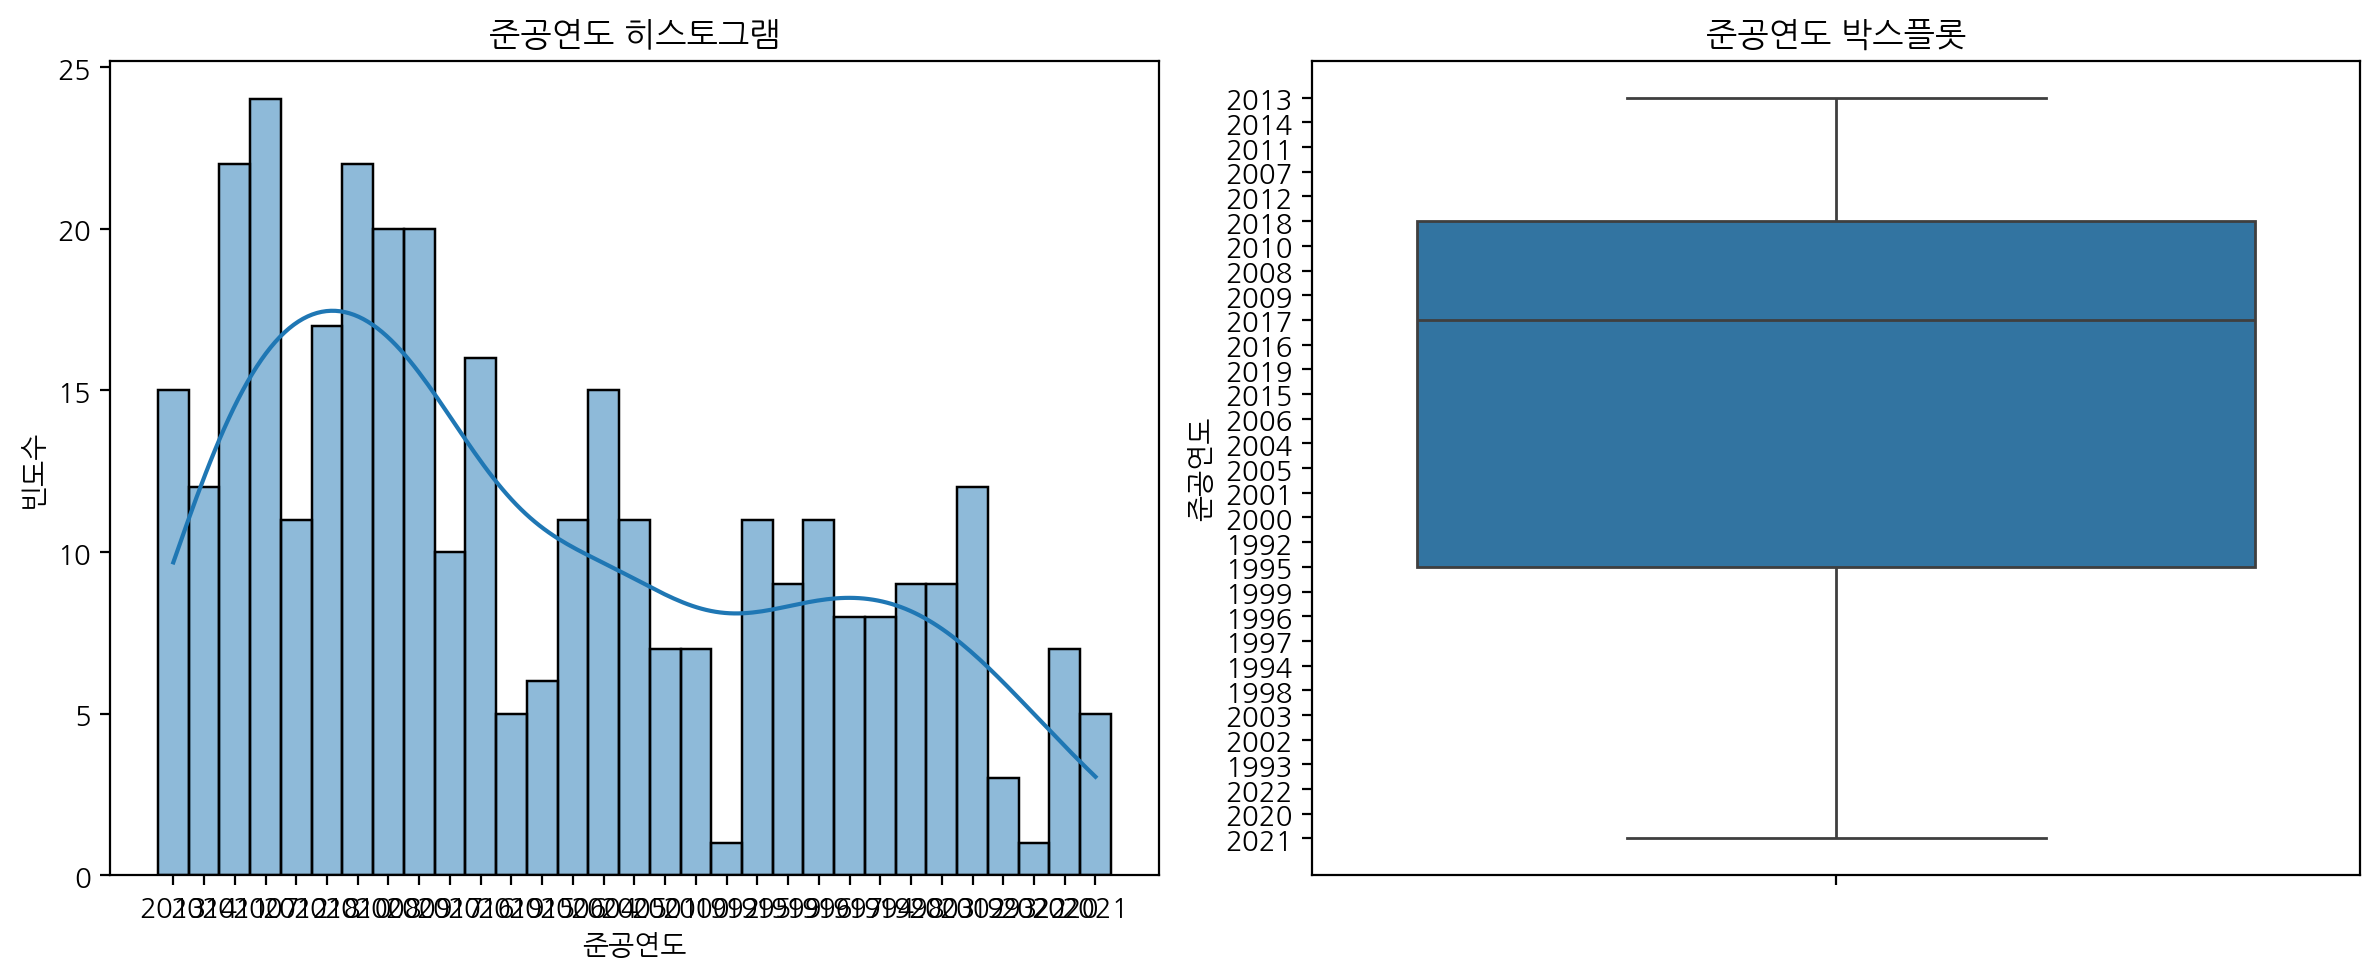

--- 임대료의 기술 통계 ---
count       345.000000
mean     197729.050210
std      158760.777669
min           0.000000
25%      112905.000000
50%      172000.000000
75%      227564.000000
max      950305.000000
Name: 임대료, dtype: float64


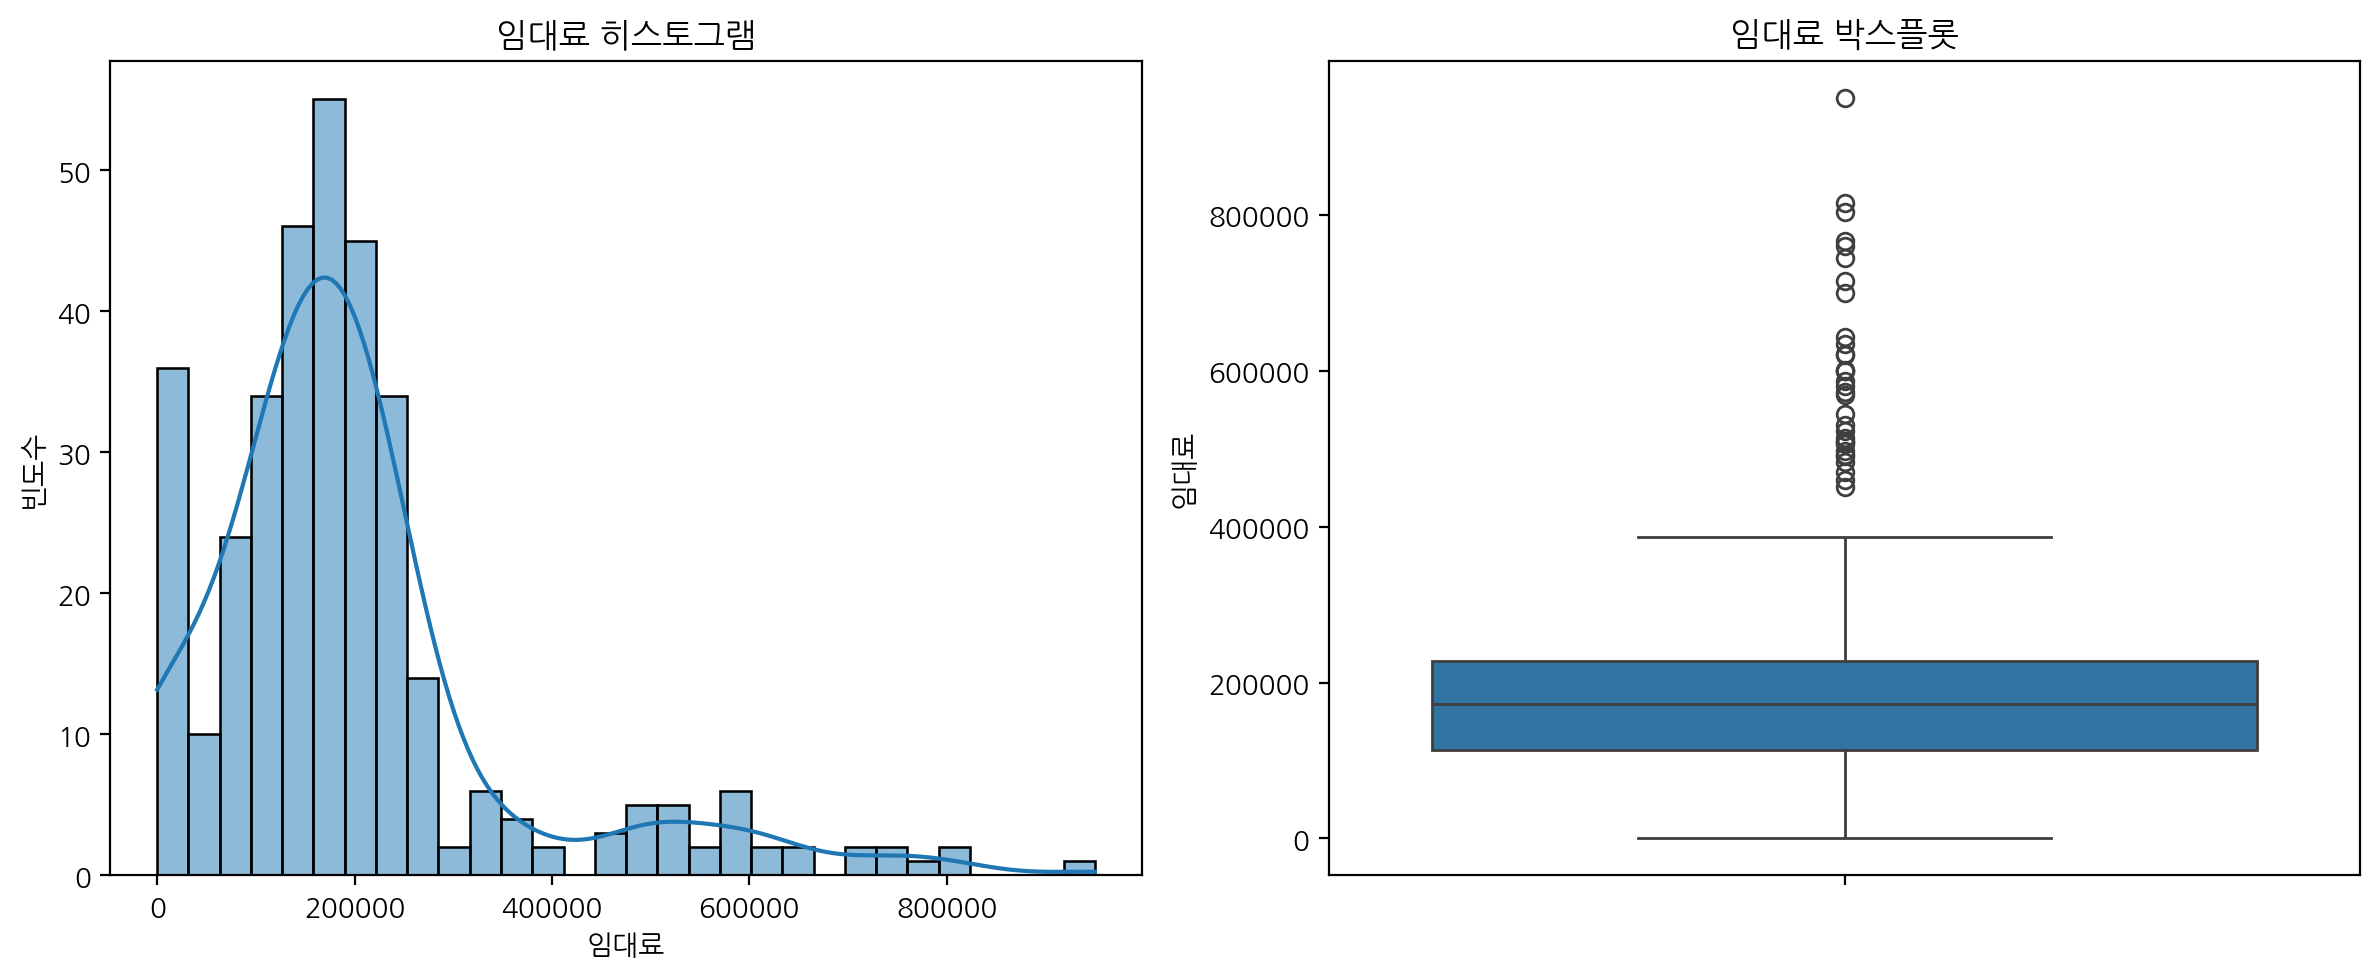

--- 임대보증금의 기술 통계 ---
count    3.450000e+02
mean     2.382737e+07
std      2.247481e+07
min      0.000000e+00
25%      1.272491e+07
50%      1.930850e+07
75%      2.837700e+07
max      1.898219e+08
Name: 임대보증금, dtype: float64


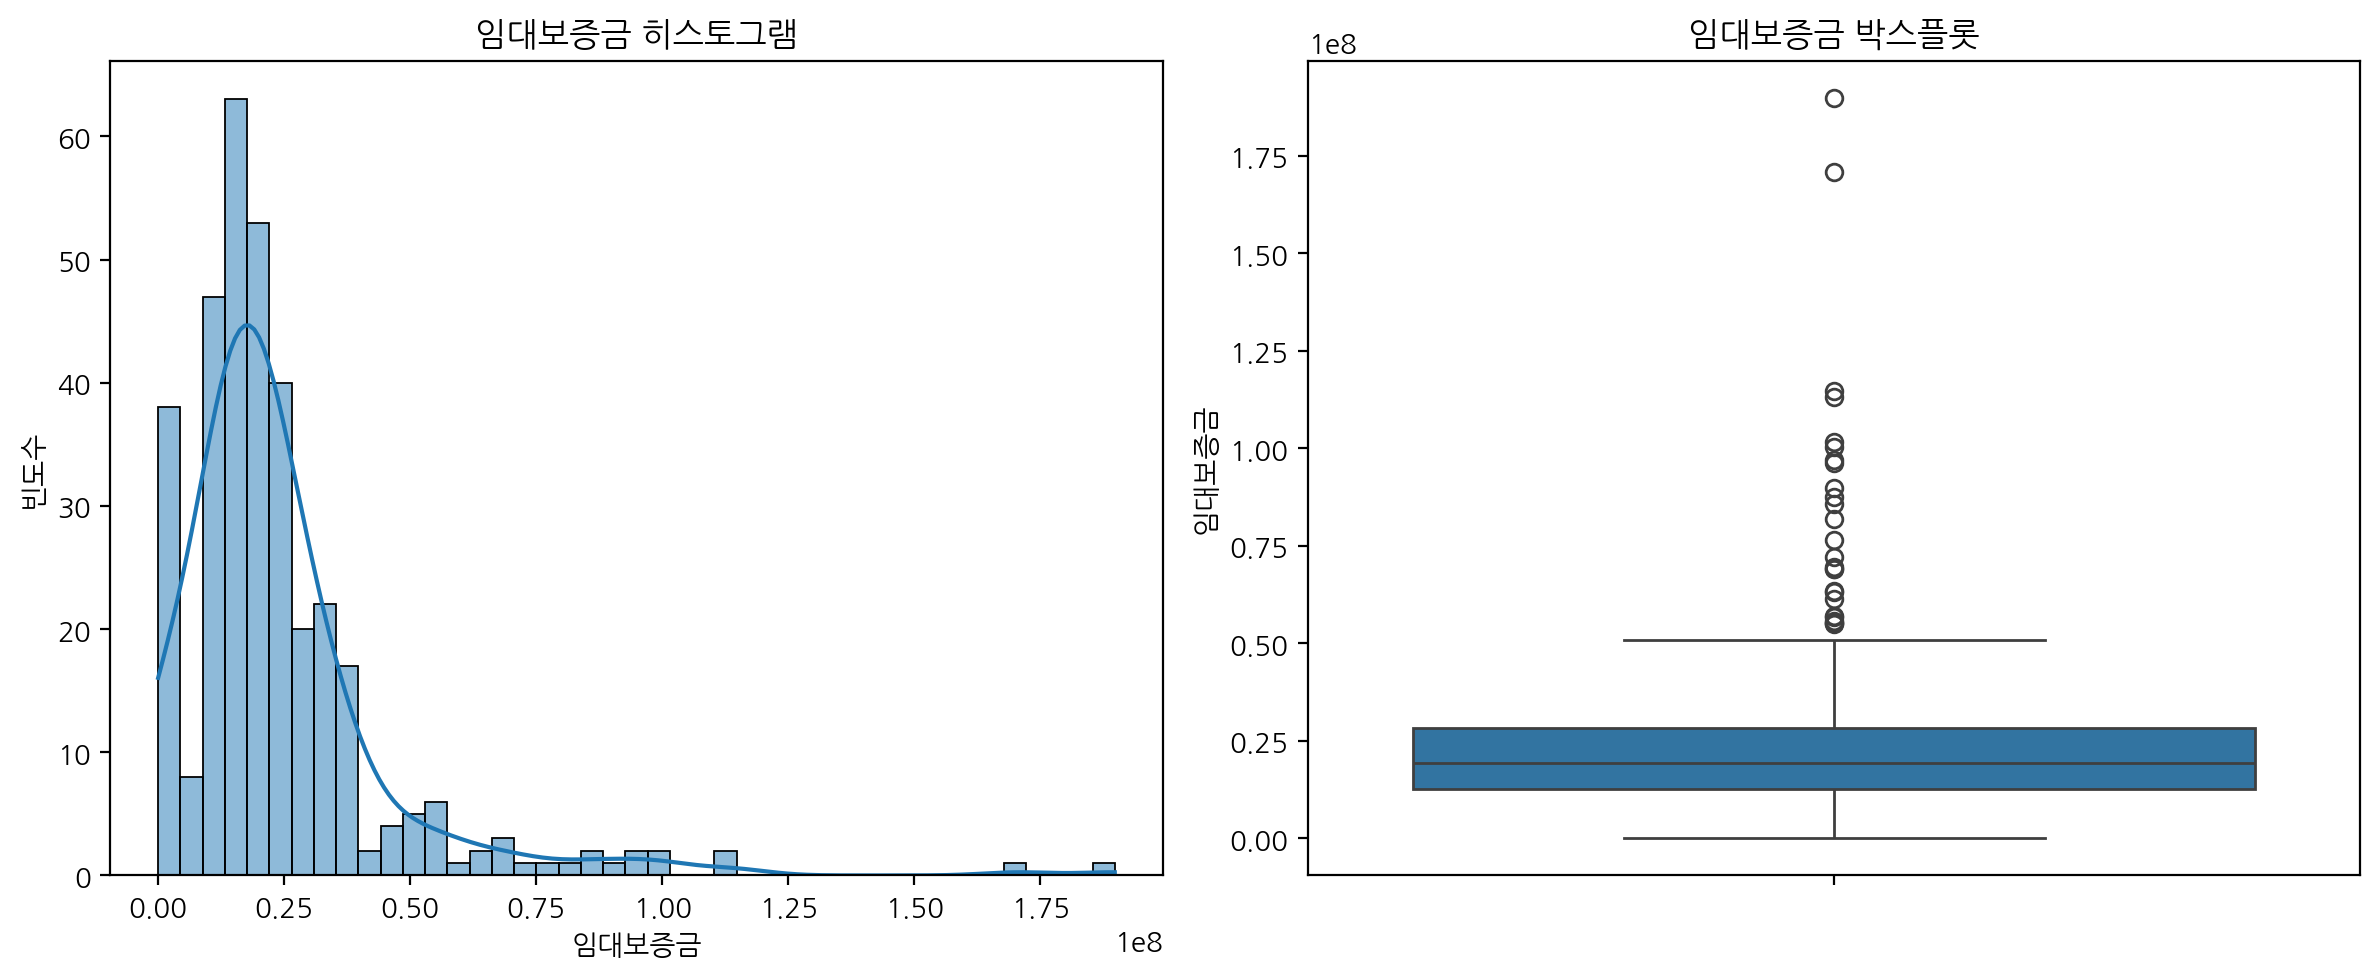

In [344]:
# 함수 만들기
def plot_continuous_variables(dataframe, columns):
    for column in columns:
        # 기술 통계 출력
        print(f"--- {column}의 기술 통계 ---")
        print(dataframe[column].describe())
        
        # 히스토그램
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[column], kde=True)
        plt.title(f'{column} 히스토그램')
        plt.xlabel(column)
        plt.ylabel('빈도수')

        # 박스플롯
        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[column])
        plt.title(f'{column} 박스플롯')
        plt.ylabel(column)

        plt.tight_layout()
        plt.show()

# 분석할 연속형 변수 목록
continuous_columns = ['실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금']

# 함수 호출
plot_continuous_variables(apart, continuous_columns)



### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

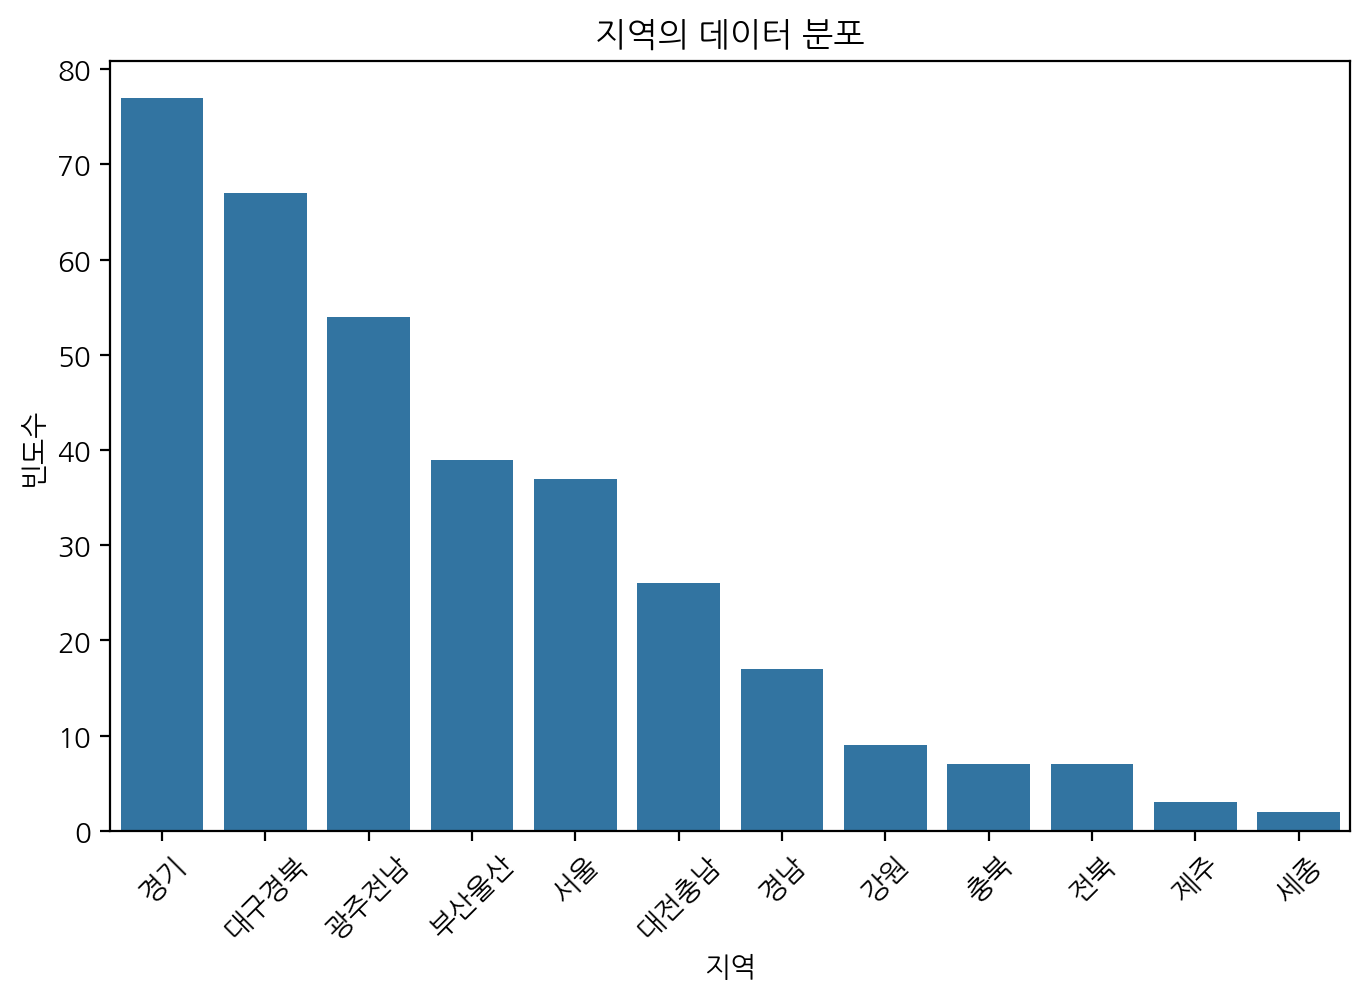

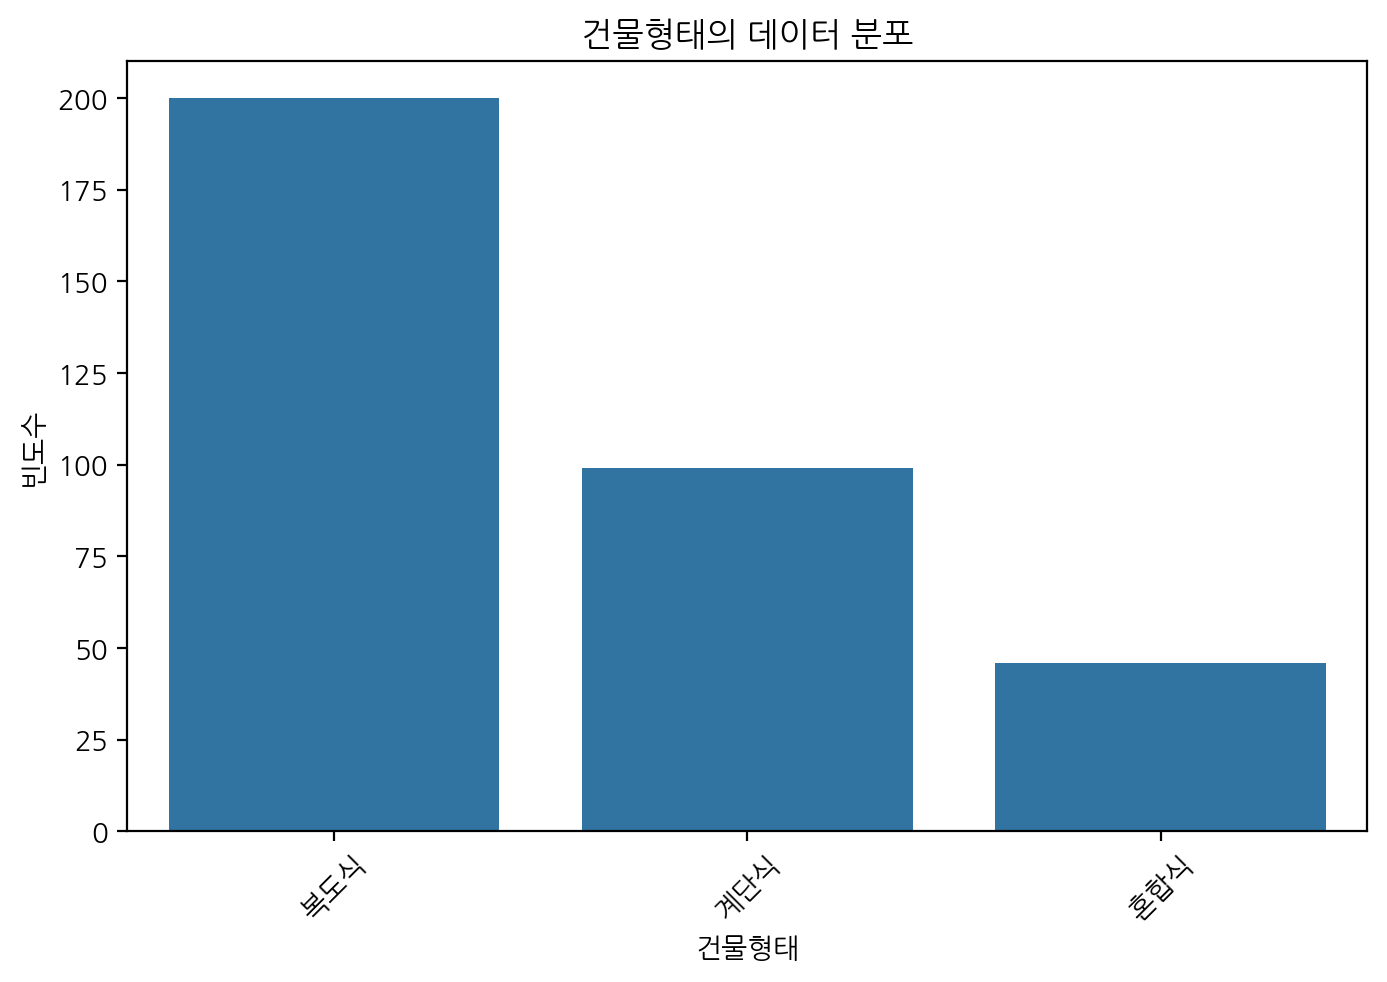

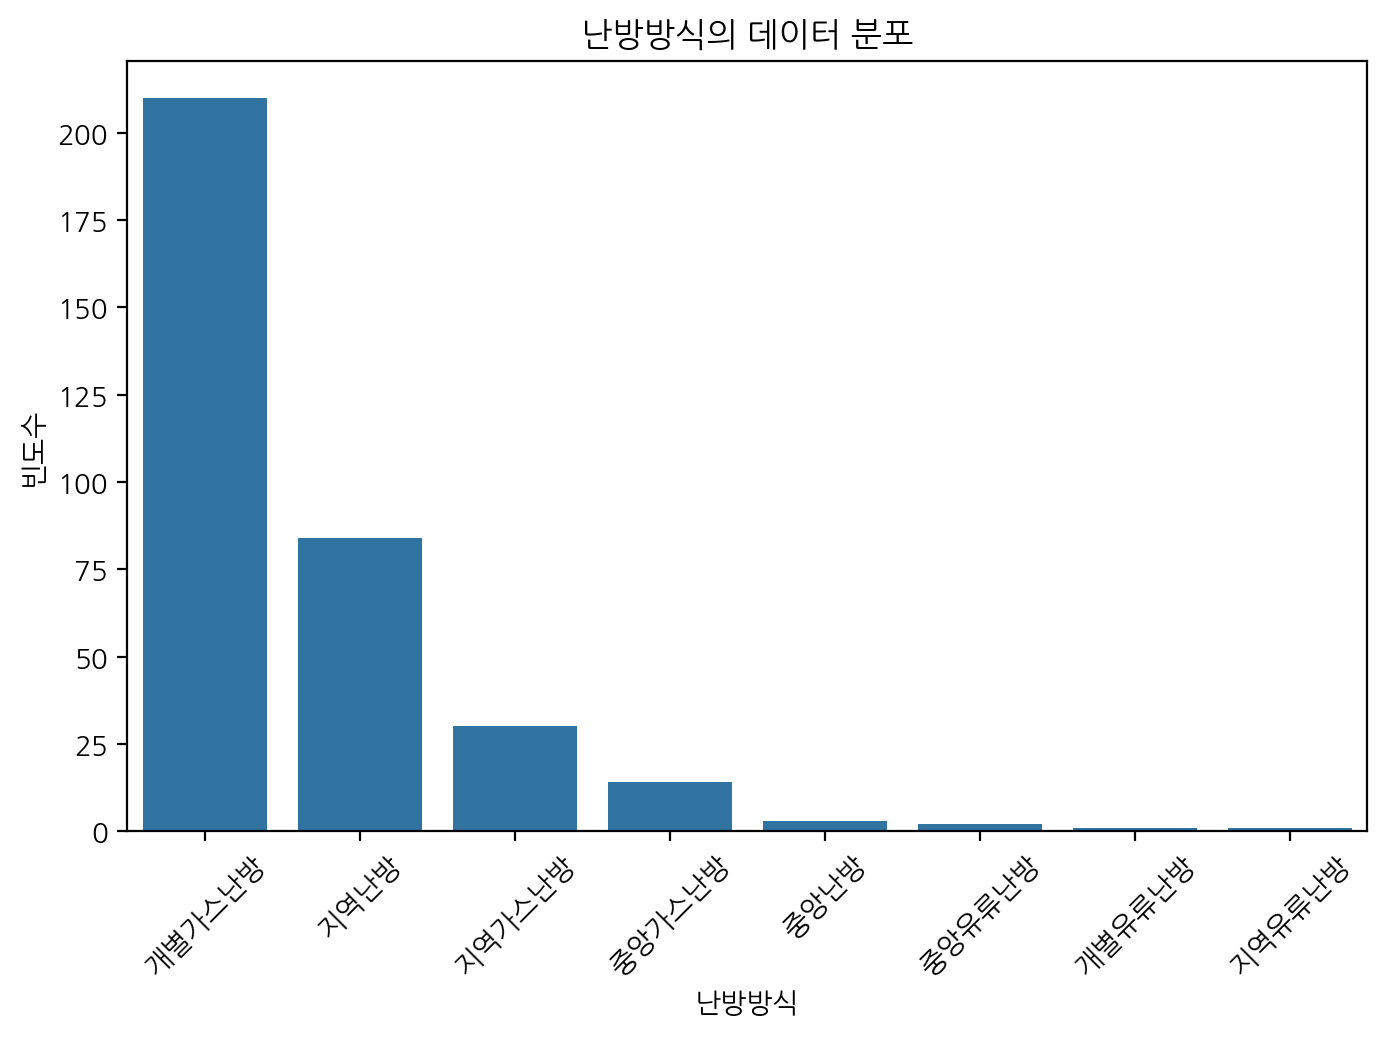

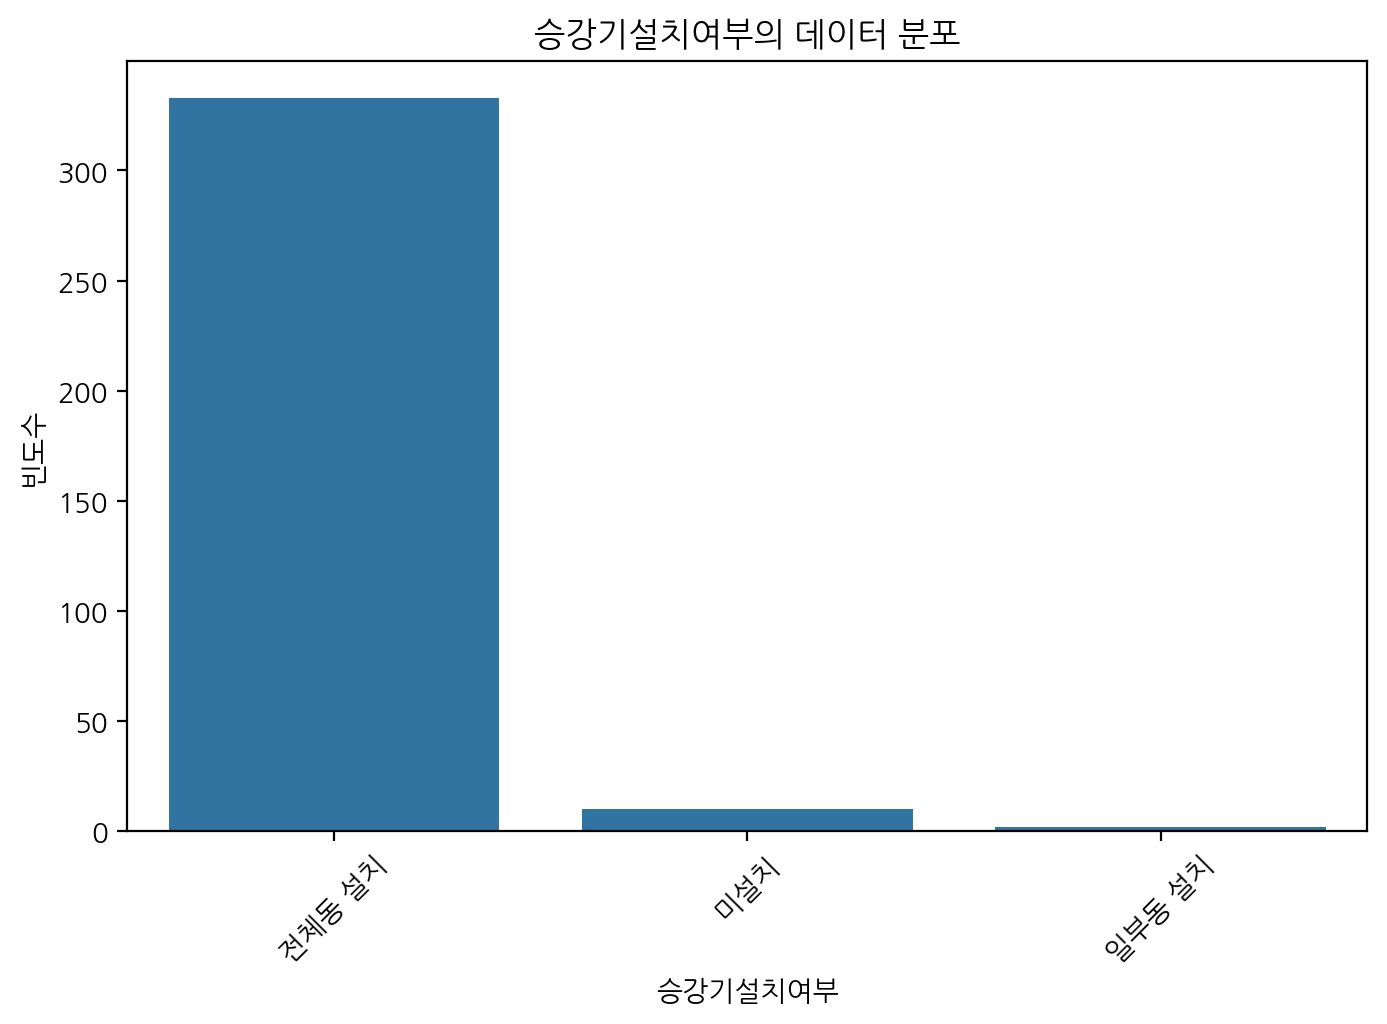

In [346]:
# 함수 만들기
def plot_categorical_variables(dataframe, columns):
    for column in columns:
        # 범주형 변수의 데이터 분포 시각화
        plt.figure(figsize=(8, 5))
        sns.countplot(data=dataframe, x=column, order=dataframe[column].value_counts().index)
        plt.title(f'{column}의 데이터 분포')
        plt.xlabel(column)
        plt.ylabel('빈도수')
        plt.xticks(rotation=45)  # x축 레이블 회전
        plt.show()

# 분석할 범주형 변수 목록
categorical_columns = ['지역', '건물형태', '난방방식', '승강기설치여부']

# 함수 호출
plot_categorical_variables(apart, categorical_columns)


#### 5) <전용면적구간>

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

<Axes: xlabel='전용면적구간', ylabel='세대수'>

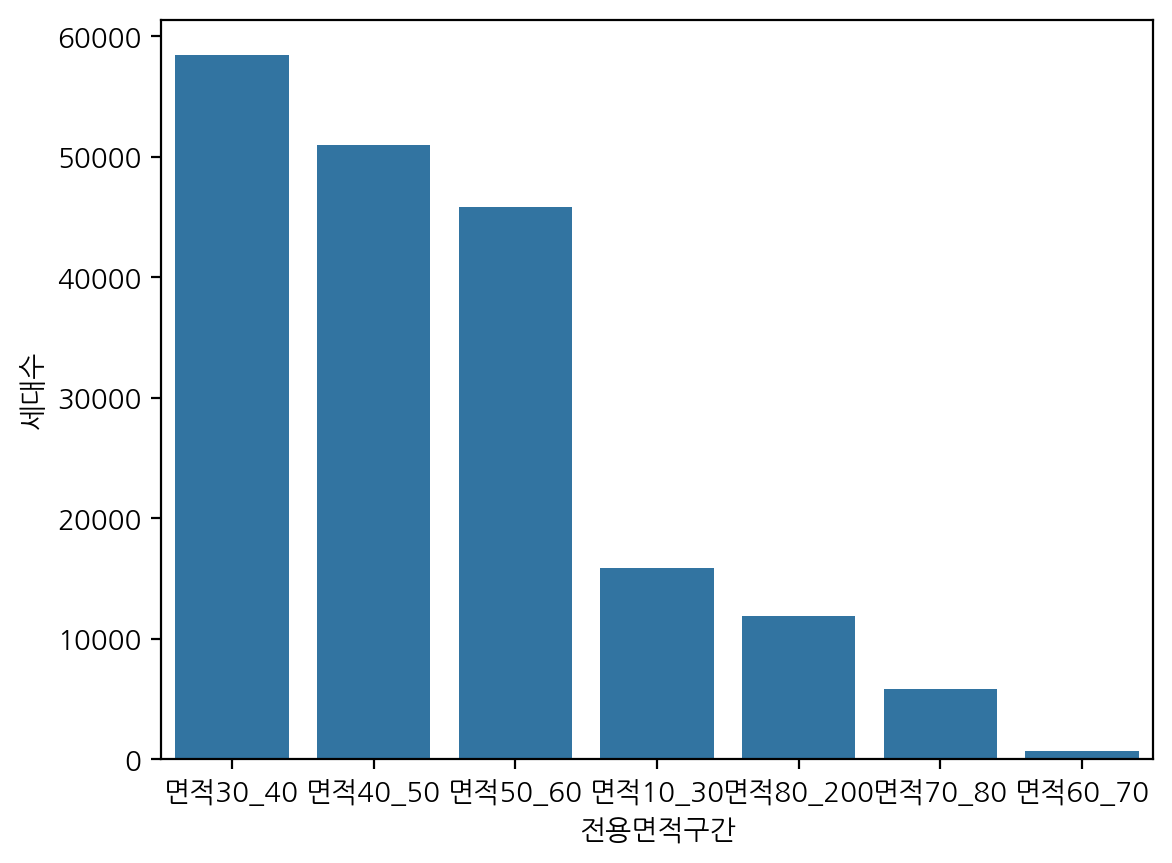

In [352]:
apart_melted=pd.melt(apart,id_vars=['단지코드','총면적','총세대수','지역','준공연도','건물형태','난방방식','승강기설치여부','실차량수','임대보증금','임대료'],var_name='전용면적구간',value_name='세대수',ignore_index=False)
apart_grouped=apart_melted.groupby('전용면적구간', as_index=True)['세대수'].sum()
apart_grouped=apart_grouped.reset_index()
apart_grouped = apart_grouped.sort_values(by='세대수', ascending=False)
sns.barplot(x='전용면적구간', y='세대수', data=apart_grouped)

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

In [355]:
df_0 = apart.loc[:,['총세대수','실차량수','총면적','임대보증금','임대료']]

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

총세대수     0.712475
실차량수     1.000000
총면적      0.822183
임대보증금    0.361867
임대료      0.337066
Name: 실차량수, dtype: float64


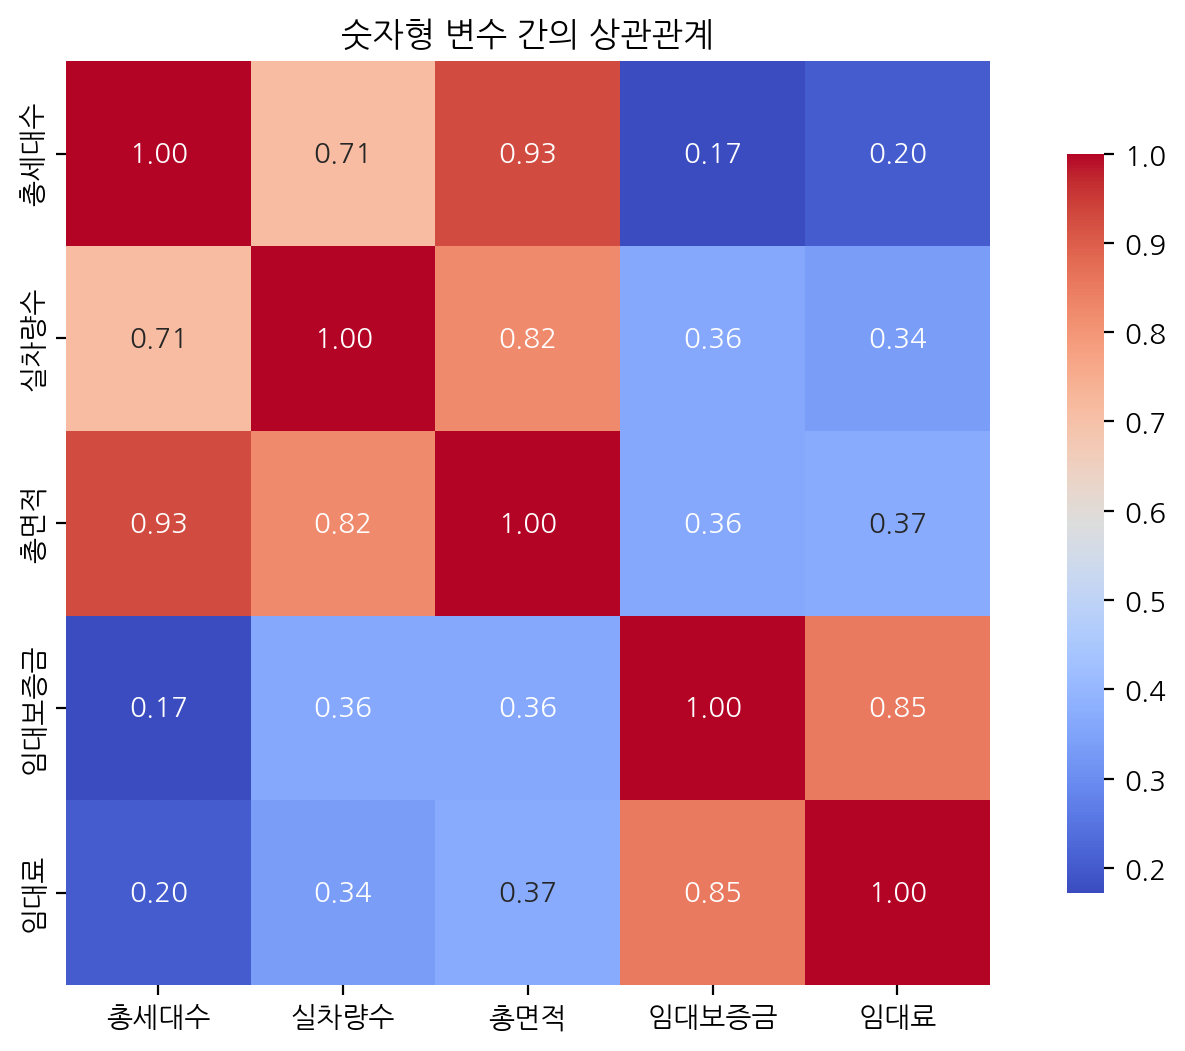

In [358]:
# 상관계수 계산
correlation_matrix = df_0.corr()

# 실차량수와 다른 변수들 간의 상관관계 출력
print(correlation_matrix['실차량수'])

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('숫자형 변수 간의 상관관계')
plt.show()


### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

Index(['총면적', '총세대수', '임대보증금'], dtype='object')


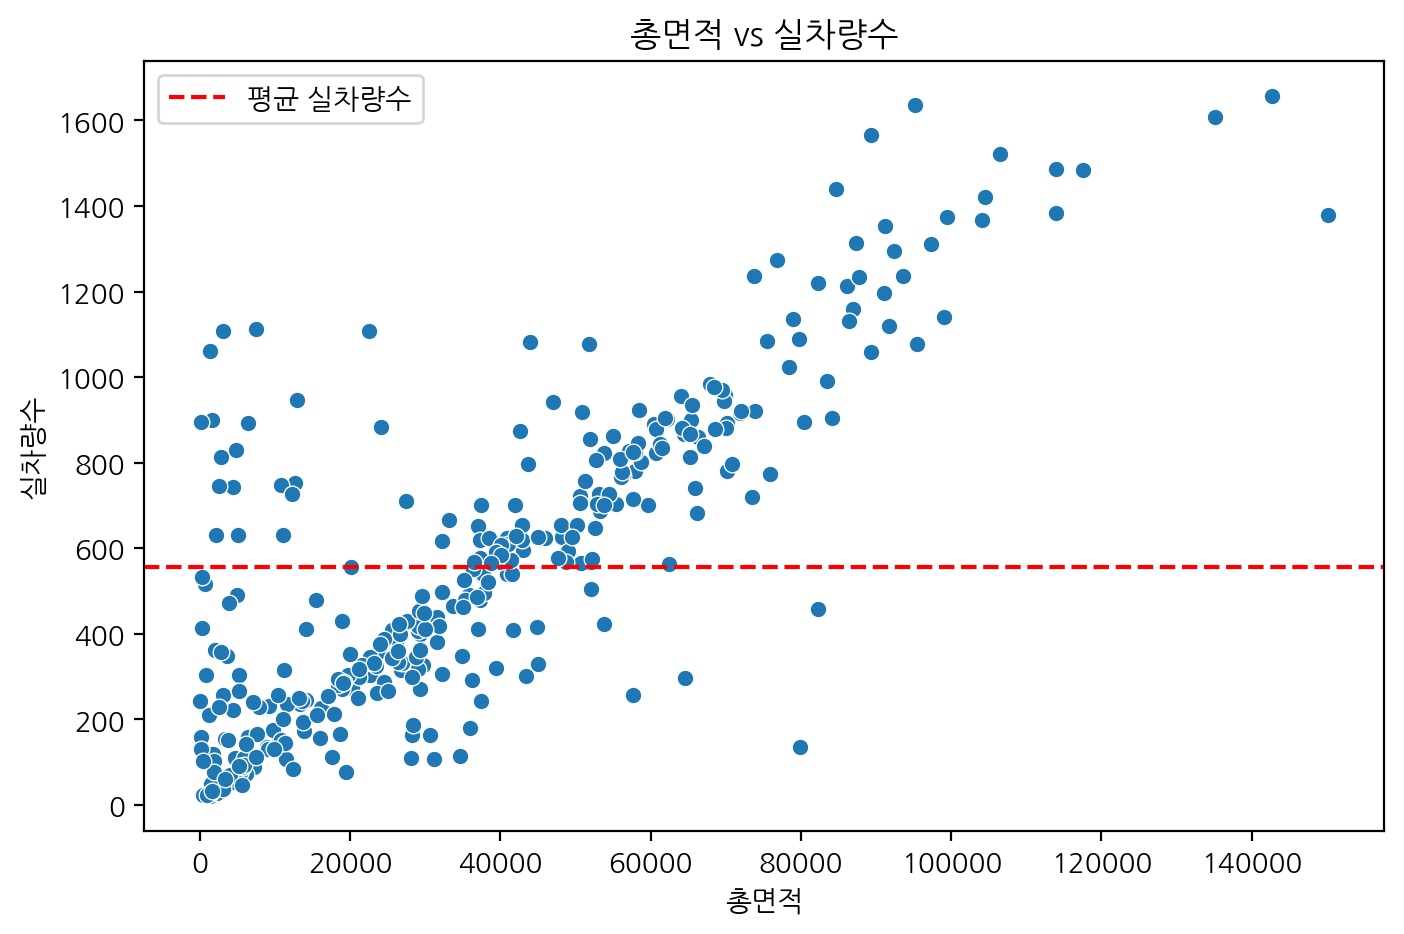

,총세대수,실차량수,총면적,임대보증금,임대료
총세대수,1.000000,0.712475,0.927286,0.172154,0.203985
실차량수,0.712475,1.000000,0.822183,0.361867,0.337066
총면적,0.927286,0.822183,1.000000,0.361495,0.368626
임대보증금,0.172154,0.361867,0.361495,1.000000,0.852839
임대료,0.203985,0.337066,0.368626,0.852839,1.000000


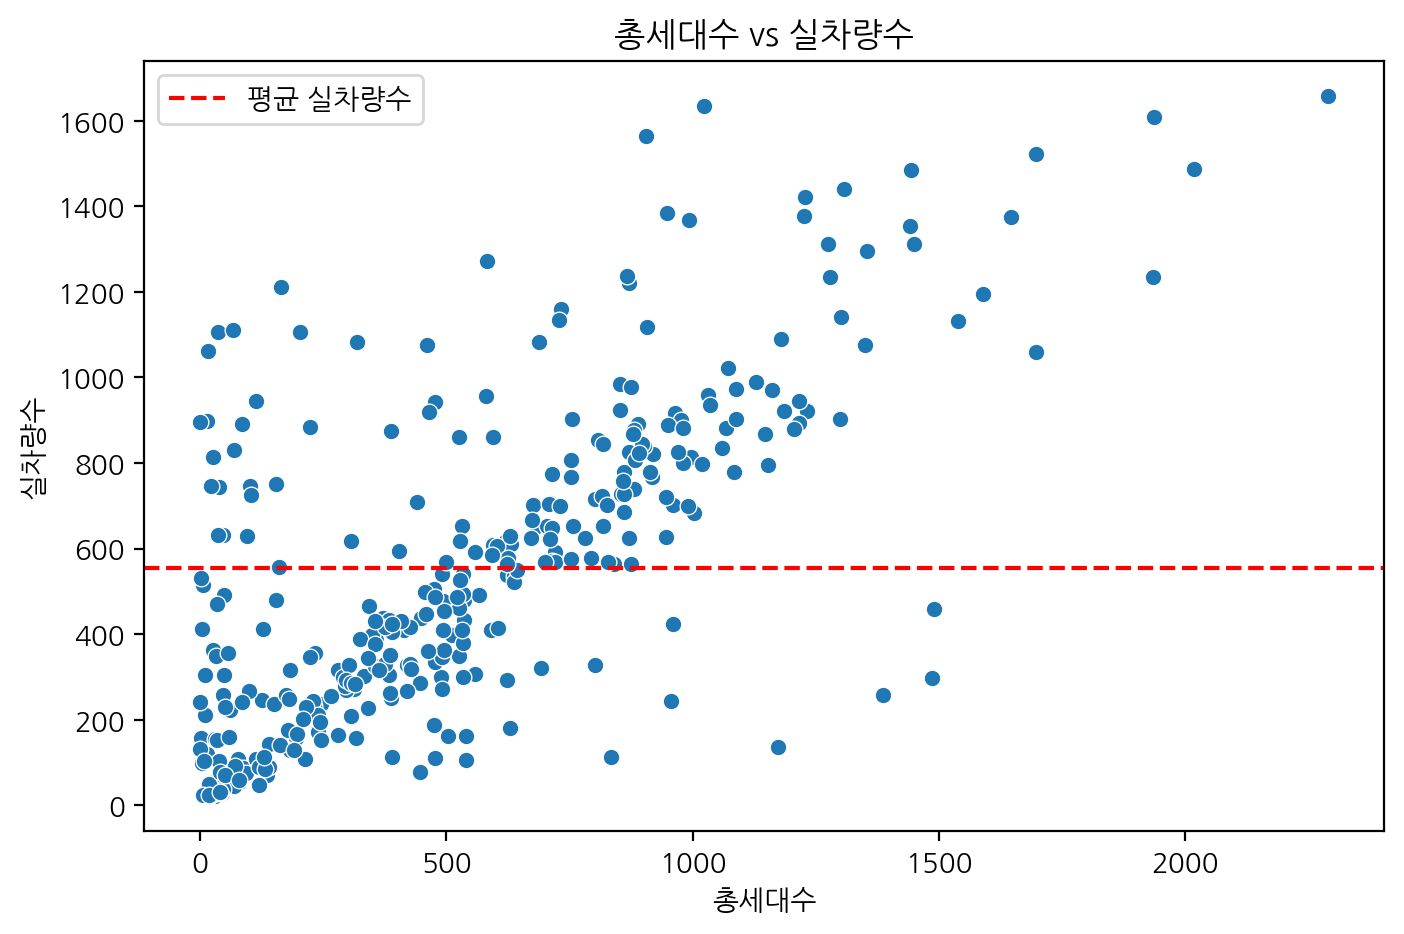

,총세대수,실차량수,총면적,임대보증금,임대료
총세대수,1.000000,0.712475,0.927286,0.172154,0.203985
실차량수,0.712475,1.000000,0.822183,0.361867,0.337066
총면적,0.927286,0.822183,1.000000,0.361495,0.368626
임대보증금,0.172154,0.361867,0.361495,1.000000,0.852839
임대료,0.203985,0.337066,0.368626,0.852839,1.000000


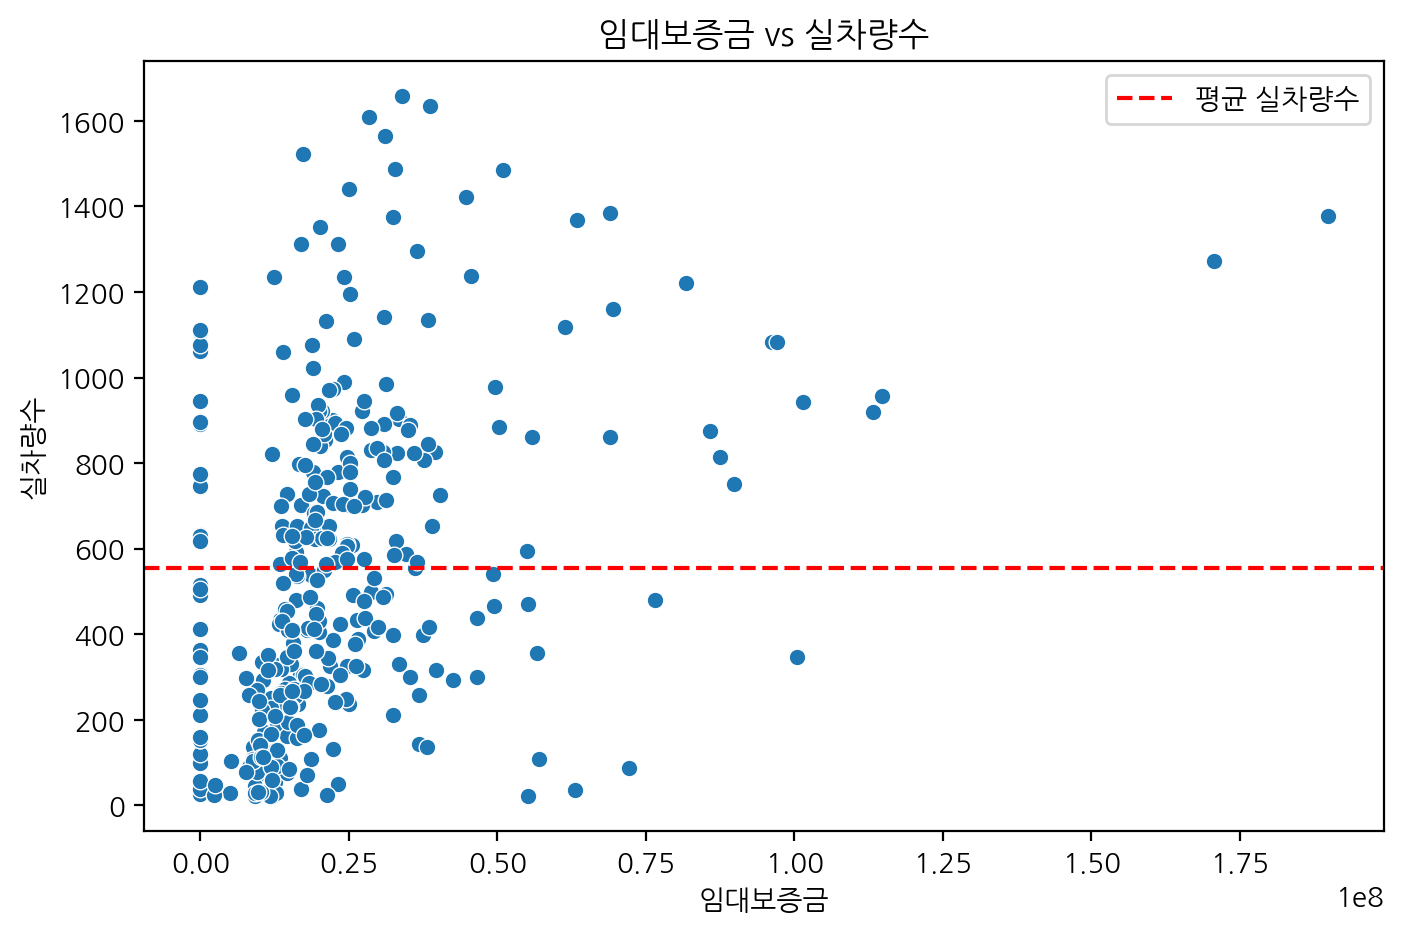

,총세대수,실차량수,총면적,임대보증금,임대료
총세대수,1.000000,0.712475,0.927286,0.172154,0.203985
실차량수,0.712475,1.000000,0.822183,0.361867,0.337066
총면적,0.927286,0.822183,1.000000,0.361495,0.368626
임대보증금,0.172154,0.361867,0.361495,1.000000,0.852839
임대료,0.203985,0.337066,0.368626,0.852839,1.000000


In [361]:
# 함수 만들기

correlation_matrix = df_0.corr()

# 실차량수와의 상관계수가 높은 상위 3개 변수 찾기
top_correlations = correlation_matrix['실차량수'].abs().nlargest(4).index[1:]  # 상위 4개 (자기자신 제외)
print(top_correlations)
# 산점도 시각화 함수 정의
def plot_scatter_with_target(dataframe, target_variable, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=dataframe, x=feature, y=target_variable)
        plt.title(f'{feature} vs {target_variable}')
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.axhline(y=dataframe[target_variable].mean(), color='r', linestyle='--', label='평균 실차량수')
        plt.legend()
        plt.show()
        display(dataframe.corr())

# 함수 호출
plot_scatter_with_target(df_0, '실차량수', top_correlations)


### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [363]:
df_1 = apart.loc[:,['지역','준공연도','건물형태','난방방식','승강기설치여부','실차량수']]
df_1

,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수
0,서울,2013,계단식,개별가스난방,전체동 설치,109
1,서울,2013,복도식,개별가스난방,전체동 설치,35
2,서울,2013,계단식,개별가스난방,전체동 설치,88
3,서울,2014,복도식,지역난방,전체동 설치,943
4,서울,2013,복도식,개별가스난방,전체동 설치,21
...,...,...,...,...,...,...
340,대전충남,1993,복도식,중앙난방,전체동 설치,298
341,대전충남,1993,복도식,중앙가스난방,전체동 설치,258
342,경기,1994,복도식,지역가스난방,전체동 설치,243
343,강원,2020,복도식,개별가스난방,전체동 설치,47


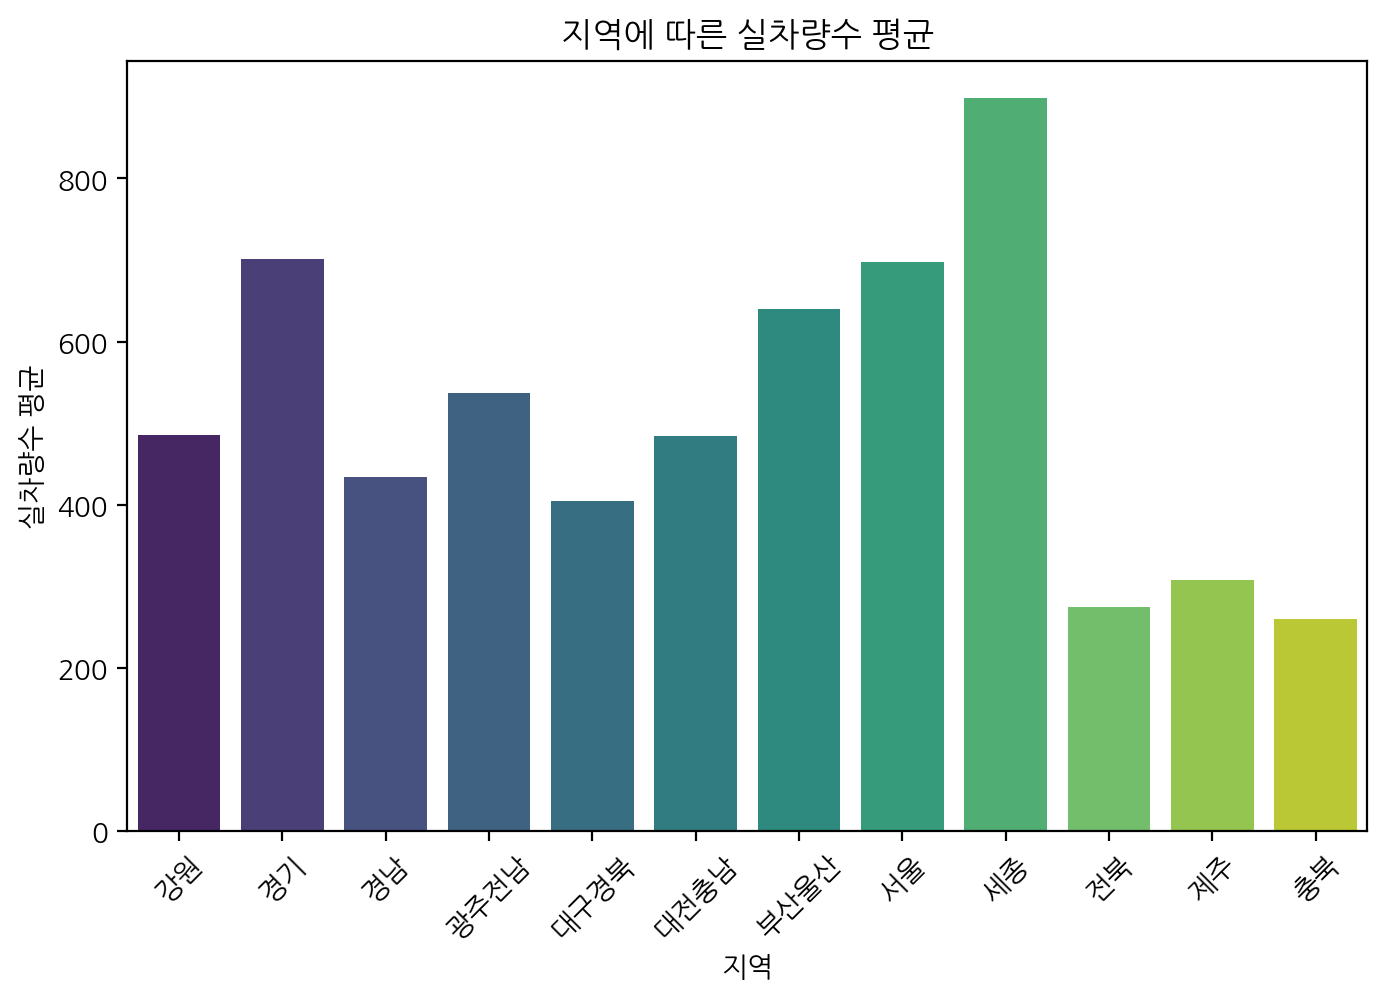

지역에 대한 ANOVA 결과: F-통계량: 4.452, p-값: 0.0000028660


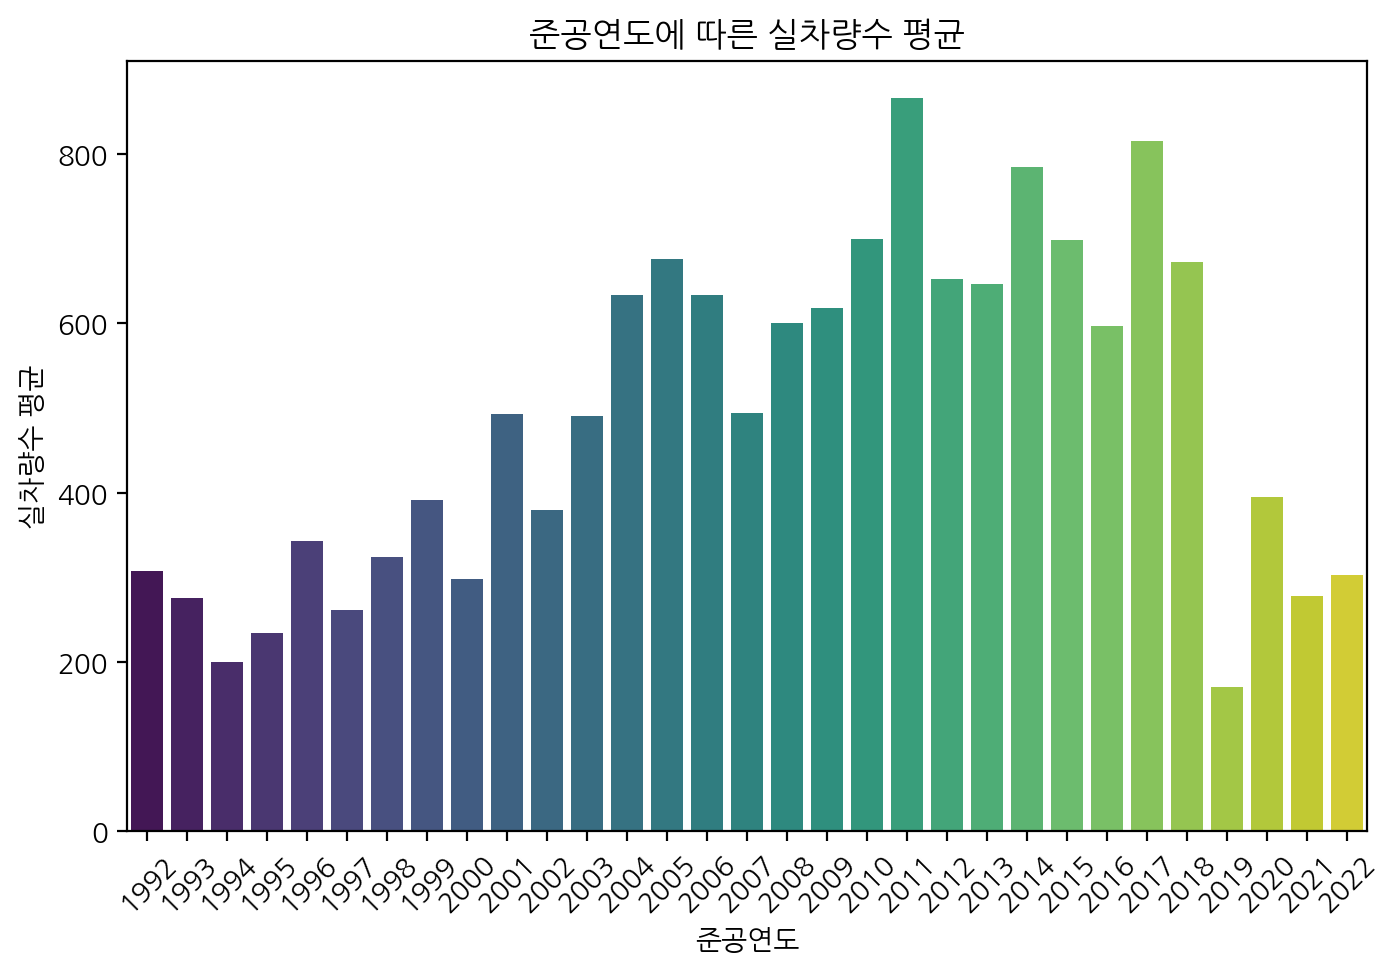

준공연도에 대한 ANOVA 결과: F-통계량: 3.333, p-값: 0.0000000542


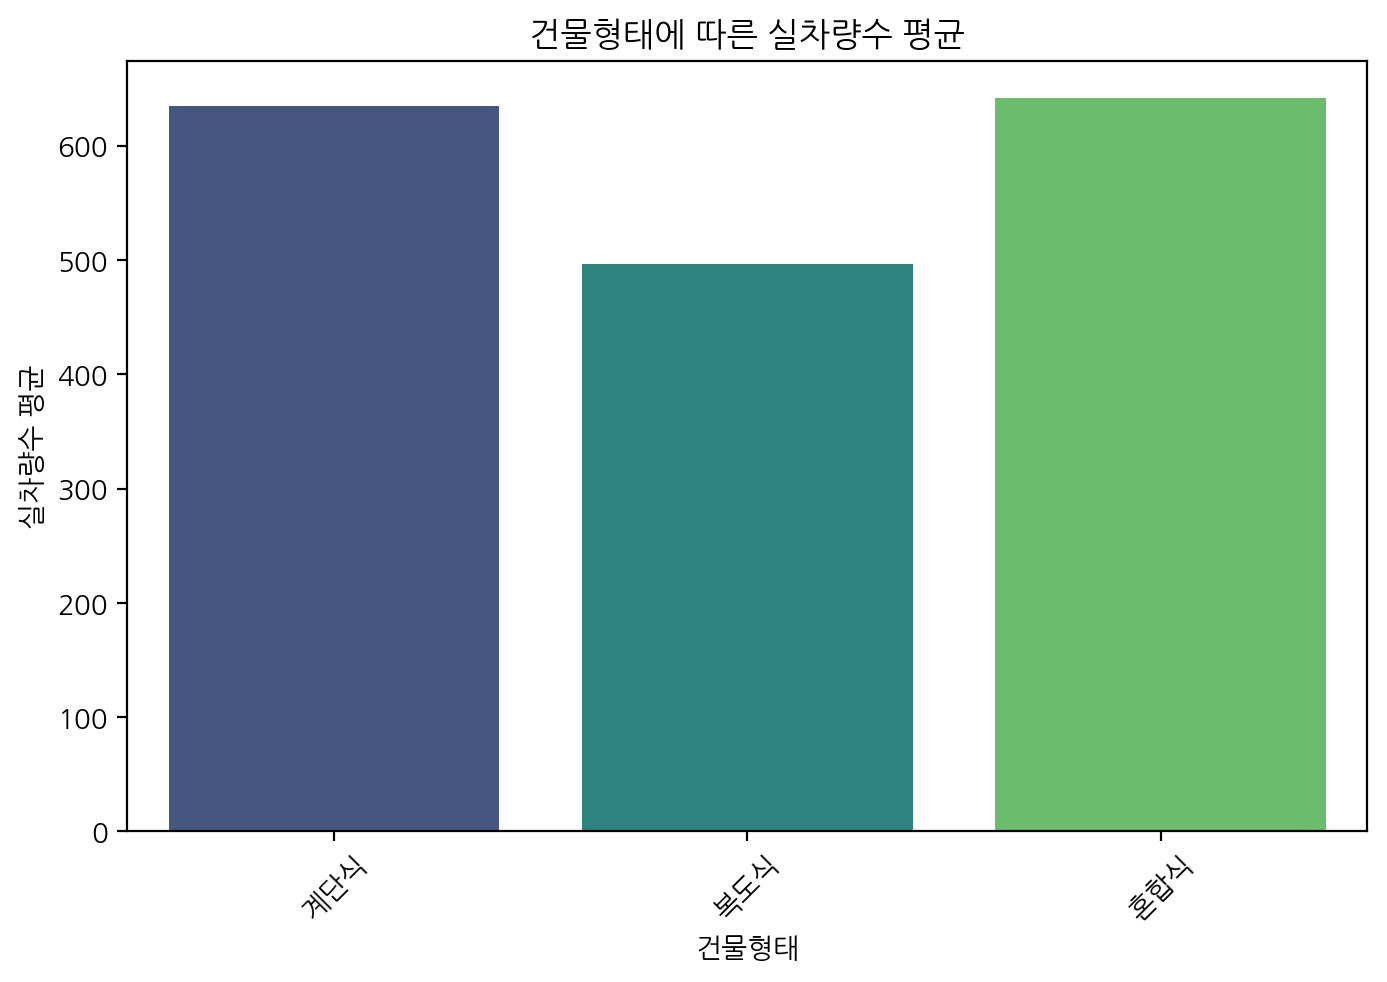

건물형태에 대한 ANOVA 결과: F-통계량: 6.076, p-값: 0.0025520611


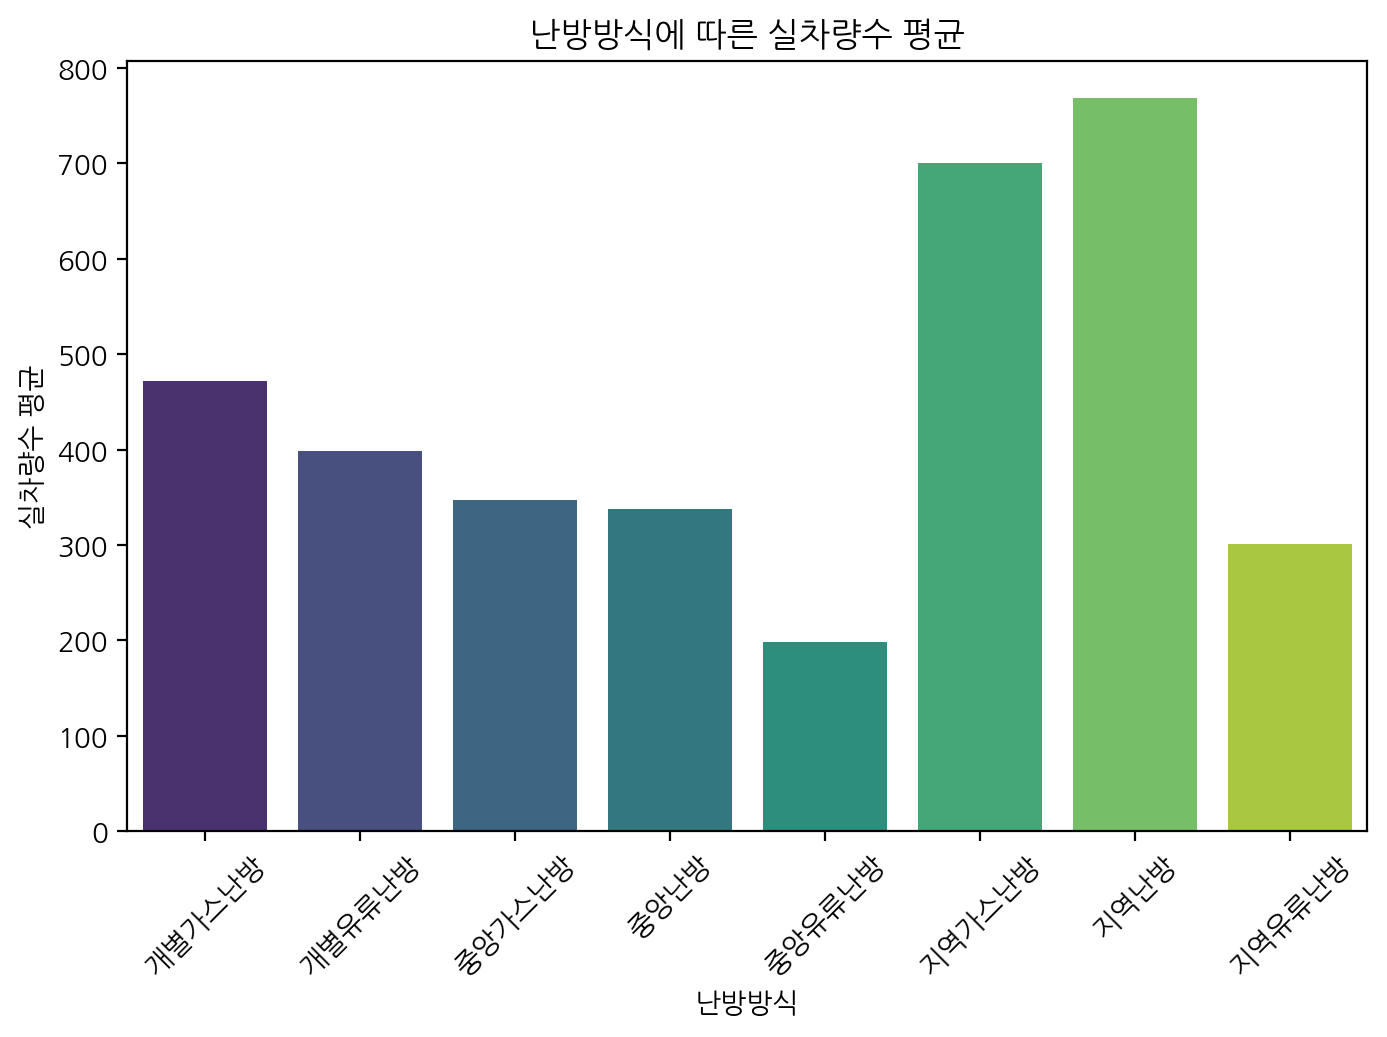

난방방식에 대한 ANOVA 결과: F-통계량: 8.189, p-값: 0.0000000032


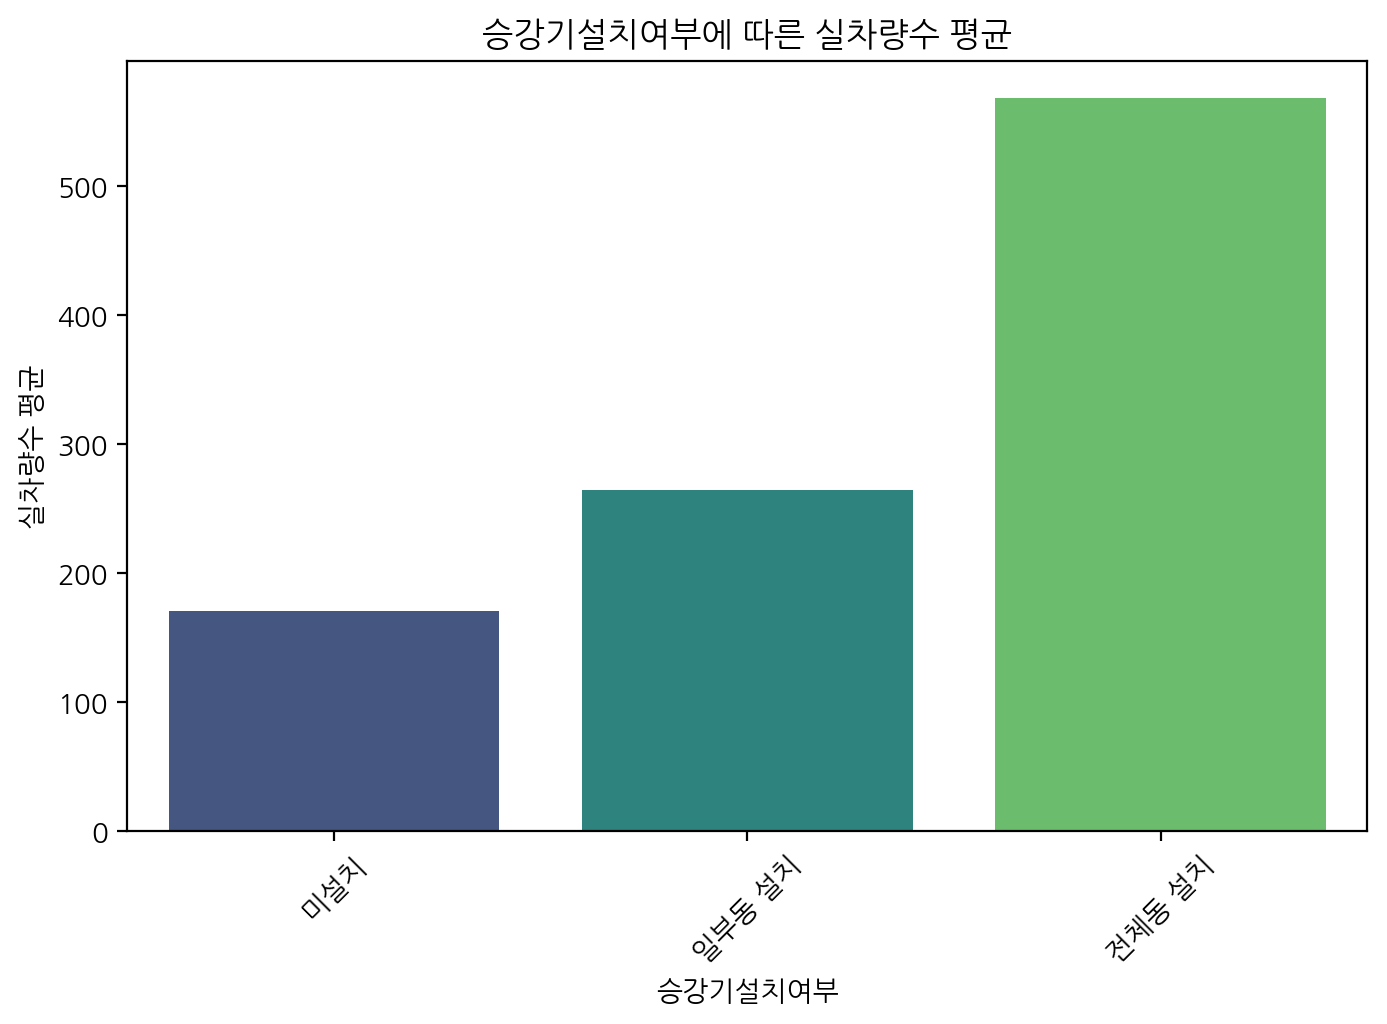

승강기설치여부에 대한 ANOVA 결과: F-통계량: 6.272, p-값: 0.0021119129


In [364]:
from scipy import stats
# 함수 만들기
def plot_category_vs_target(dataframe, target_variable, category_columns):
    for column in category_columns:
        # 범주형 변수별 실차량수 평균 계산
        mean_values = dataframe.groupby(column)[target_variable].mean().reset_index()
        
        # 막대 그래프 시각화
        plt.figure(figsize=(8, 5))
        sns.barplot(data=mean_values, x=column, y=target_variable, palette='viridis')
        plt.title(f'{column}에 따른 {target_variable} 평균')
        plt.xlabel(column)
        plt.ylabel(f'{target_variable} 평균')
        plt.xticks(rotation=45)  # x축 레이블 회전
        plt.show()
        # ANOVA 수행
        # 각 지역별로 실차량수 데이터를 추출
        # 각 범주에 대한 데이터 추출
        groups = [dataframe[dataframe[column] == value][target_variable].dropna() for value in dataframe[column].unique()]
        
        # ANOVA 수행
        if len(groups) > 1:  # 두 개 이상의 그룹이 있는지 확인
            f_stat, p_value = stats.f_oneway(*groups)
            # 결과 출력
            print(f"{column}에 대한 ANOVA 결과: F-통계량: {f_stat:.3f}, p-값: {p_value:.10f}")
        else:
            print(f"{column}에 대한 ANOVA를 수행할 수 없습니다. 데이터가 부족합니다.")
            
# 분석할 범주형 변수 목록
categorical_columns = ['지역', '준공연도', '건물형태', '난방방식', '승강기설치여부']

# 함수 호출
plot_category_vs_target(df_1, '실차량수', categorical_columns)



## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [369]:

# (1) 난방방식 값 변경
apart['난방방식'] = apart['난방방식'].replace({
    '개별가스난방': '개별',
    '개별유류난방': '개별',
    '지역난방': '지역',
    '지역가스난방': '지역',
    '지역유류난방': '지역',
    '중앙가스난방': '중앙',
    '중앙난방': '중앙',
    '중앙유류난방': '중앙'
})



In [370]:

# 결과 출력
display(apart)


,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,C0354,1485,대전충남,1993,복도식,중앙,전체동 설치,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙,전체동 설치,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역,전체동 설치,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별,전체동 설치,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [375]:
# (1) 난방방식 값 변경
apart['승강기설치여부'] = apart['승강기설치여부'].replace({
    '전체동 설치': '1',
    '일부동 설치': '0',
    '미설치': '0'
})


In [377]:
apart

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,C0354,1485,대전충남,1993,복도식,중앙,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [380]:
# (2) 불필요한 변수 제거
apart.drop(columns=['단지코드', '지역'], inplace=True)


In [382]:
apart

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,복도식,중앙,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,1386,1993,복도식,중앙,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,956,1994,복도식,지역,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,120,2020,복도식,개별,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


In [384]:
def replace_outliers2(data, col_name):
    # IQR 기반 이상치 탐지
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 평균값으로 대체
    replacement_value = data[col_name].median()
    data[col_name] = np.where((data[col_name] < lower_bound) | (data[col_name] > upper_bound), replacement_value, data[col_name])

    return data

In [386]:
apart=replace_outliers2(apart,'총세대수')
apart=replace_outliers2(apart,'총면적')
apart=replace_outliers2(apart,'임대료')
apart=replace_outliers2(apart,'임대보증금')

- 최종 데이터를 확인합니다.

--- 실차량수의 기술 통계 ---
count     345.000000
mean      555.431884
std       374.640474
min        21.000000
25%       258.000000
50%       498.000000
75%       822.000000
max      1657.000000
Name: 실차량수, dtype: float64


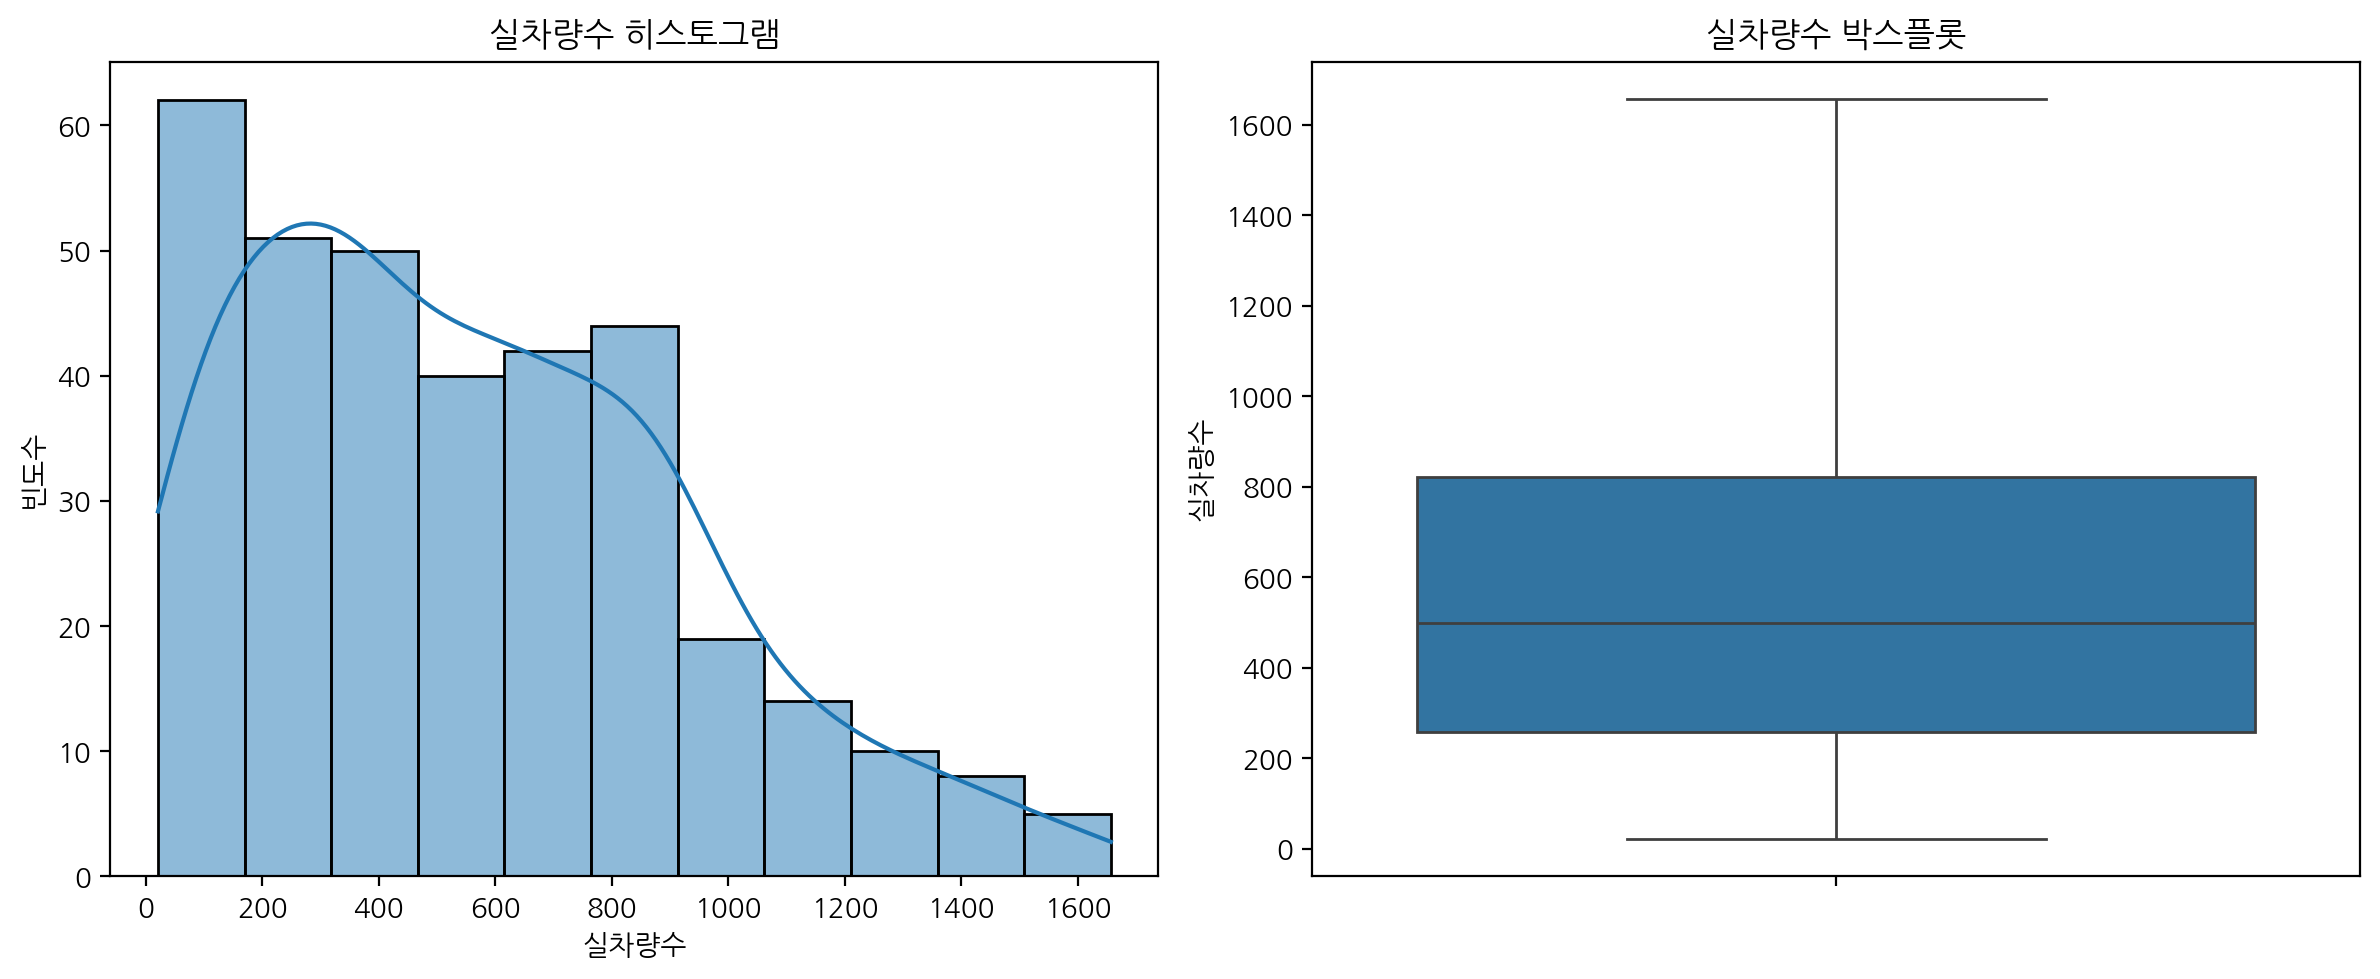

--- 총세대수의 기술 통계 ---
count     345.000000
mean      528.747826
std       400.395579
min         1.000000
25%       178.000000
50%       491.000000
75%       828.000000
max      1696.000000
Name: 총세대수, dtype: float64


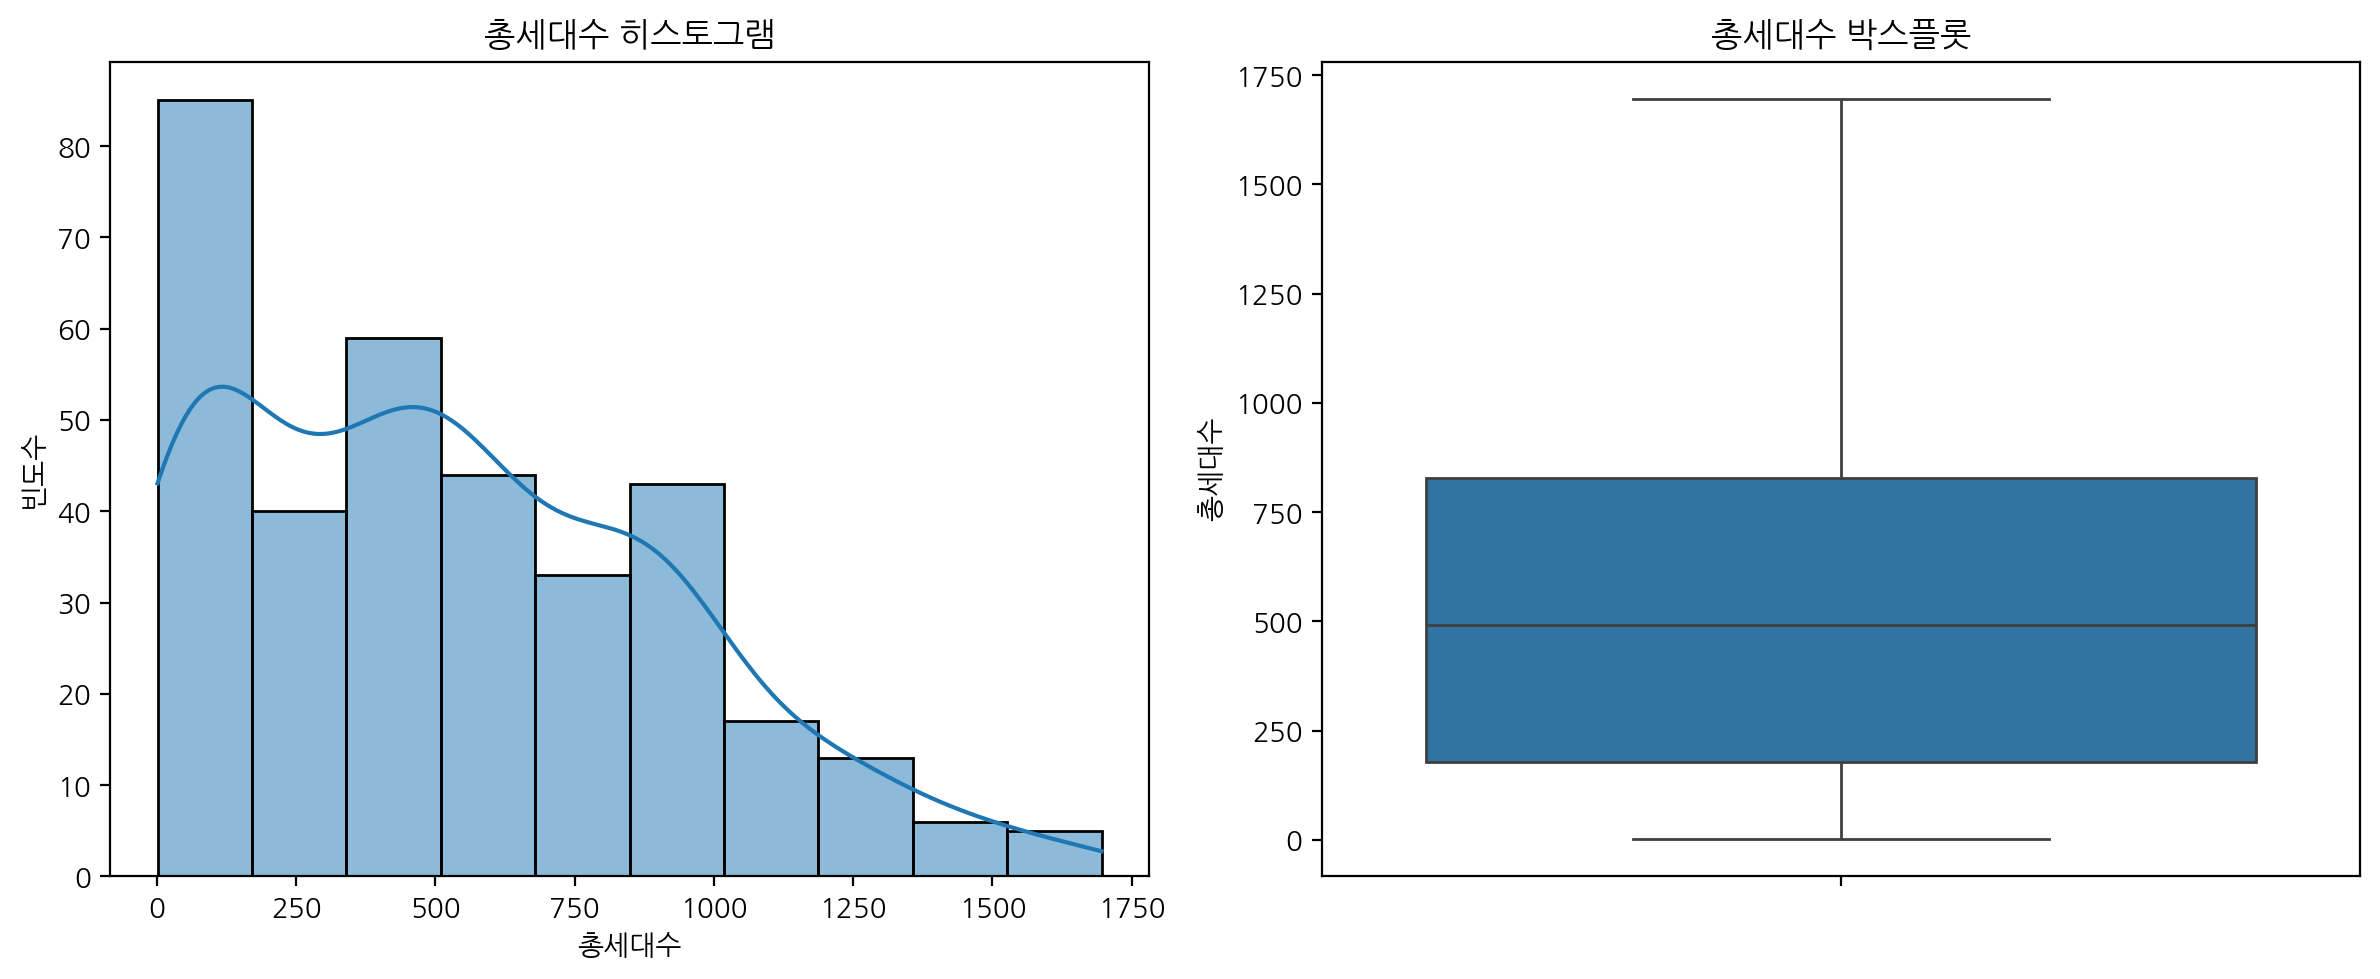

--- 총면적의 기술 통계 ---
count       345.000000
mean      36322.304839
std       27886.286987
min          68.930000
25%       11293.832100
50%       32190.360000
75%       55426.712300
max      117542.551900
Name: 총면적, dtype: float64


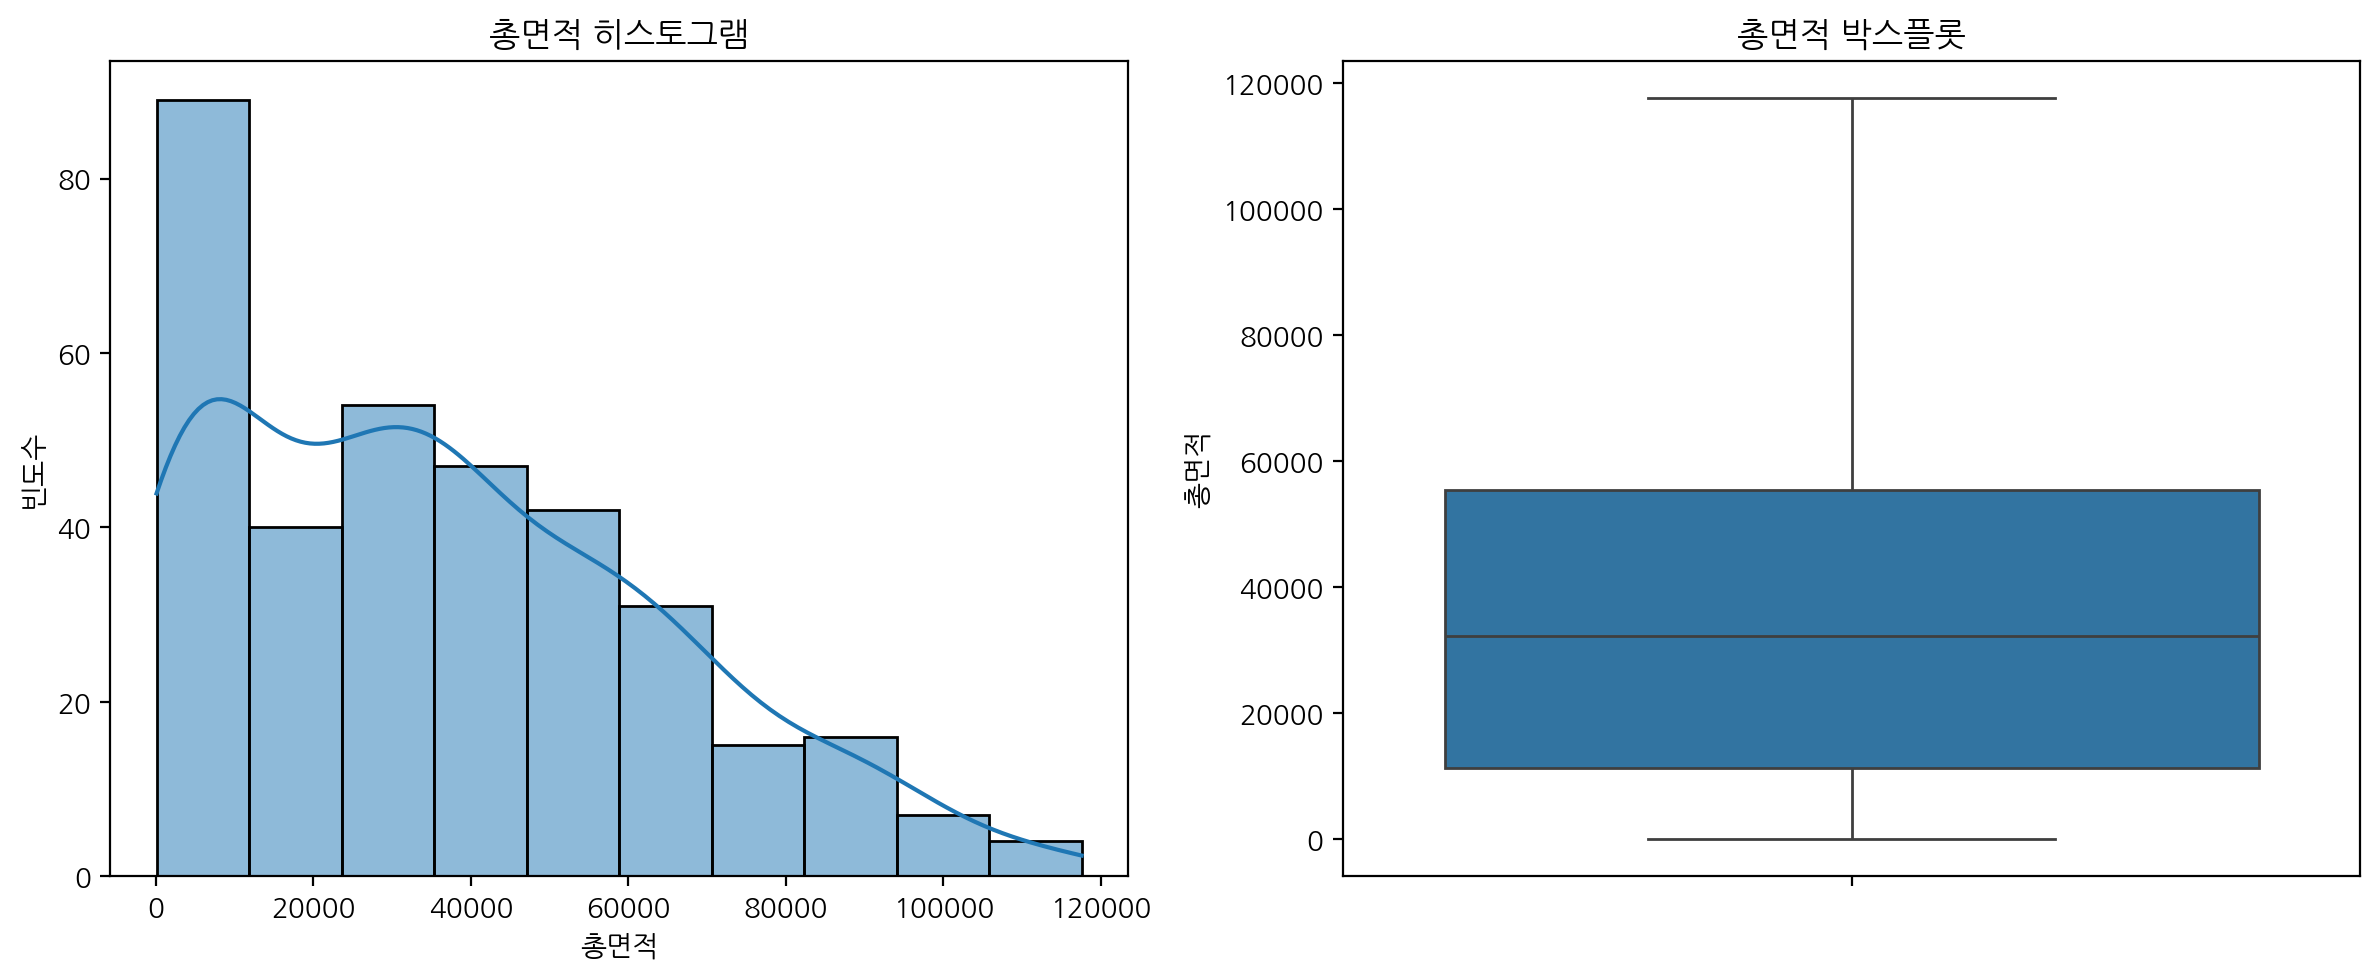

--- 준공연도의 기술 통계 ---
count      345
unique      31
top       2007
freq        24
Name: 준공연도, dtype: object


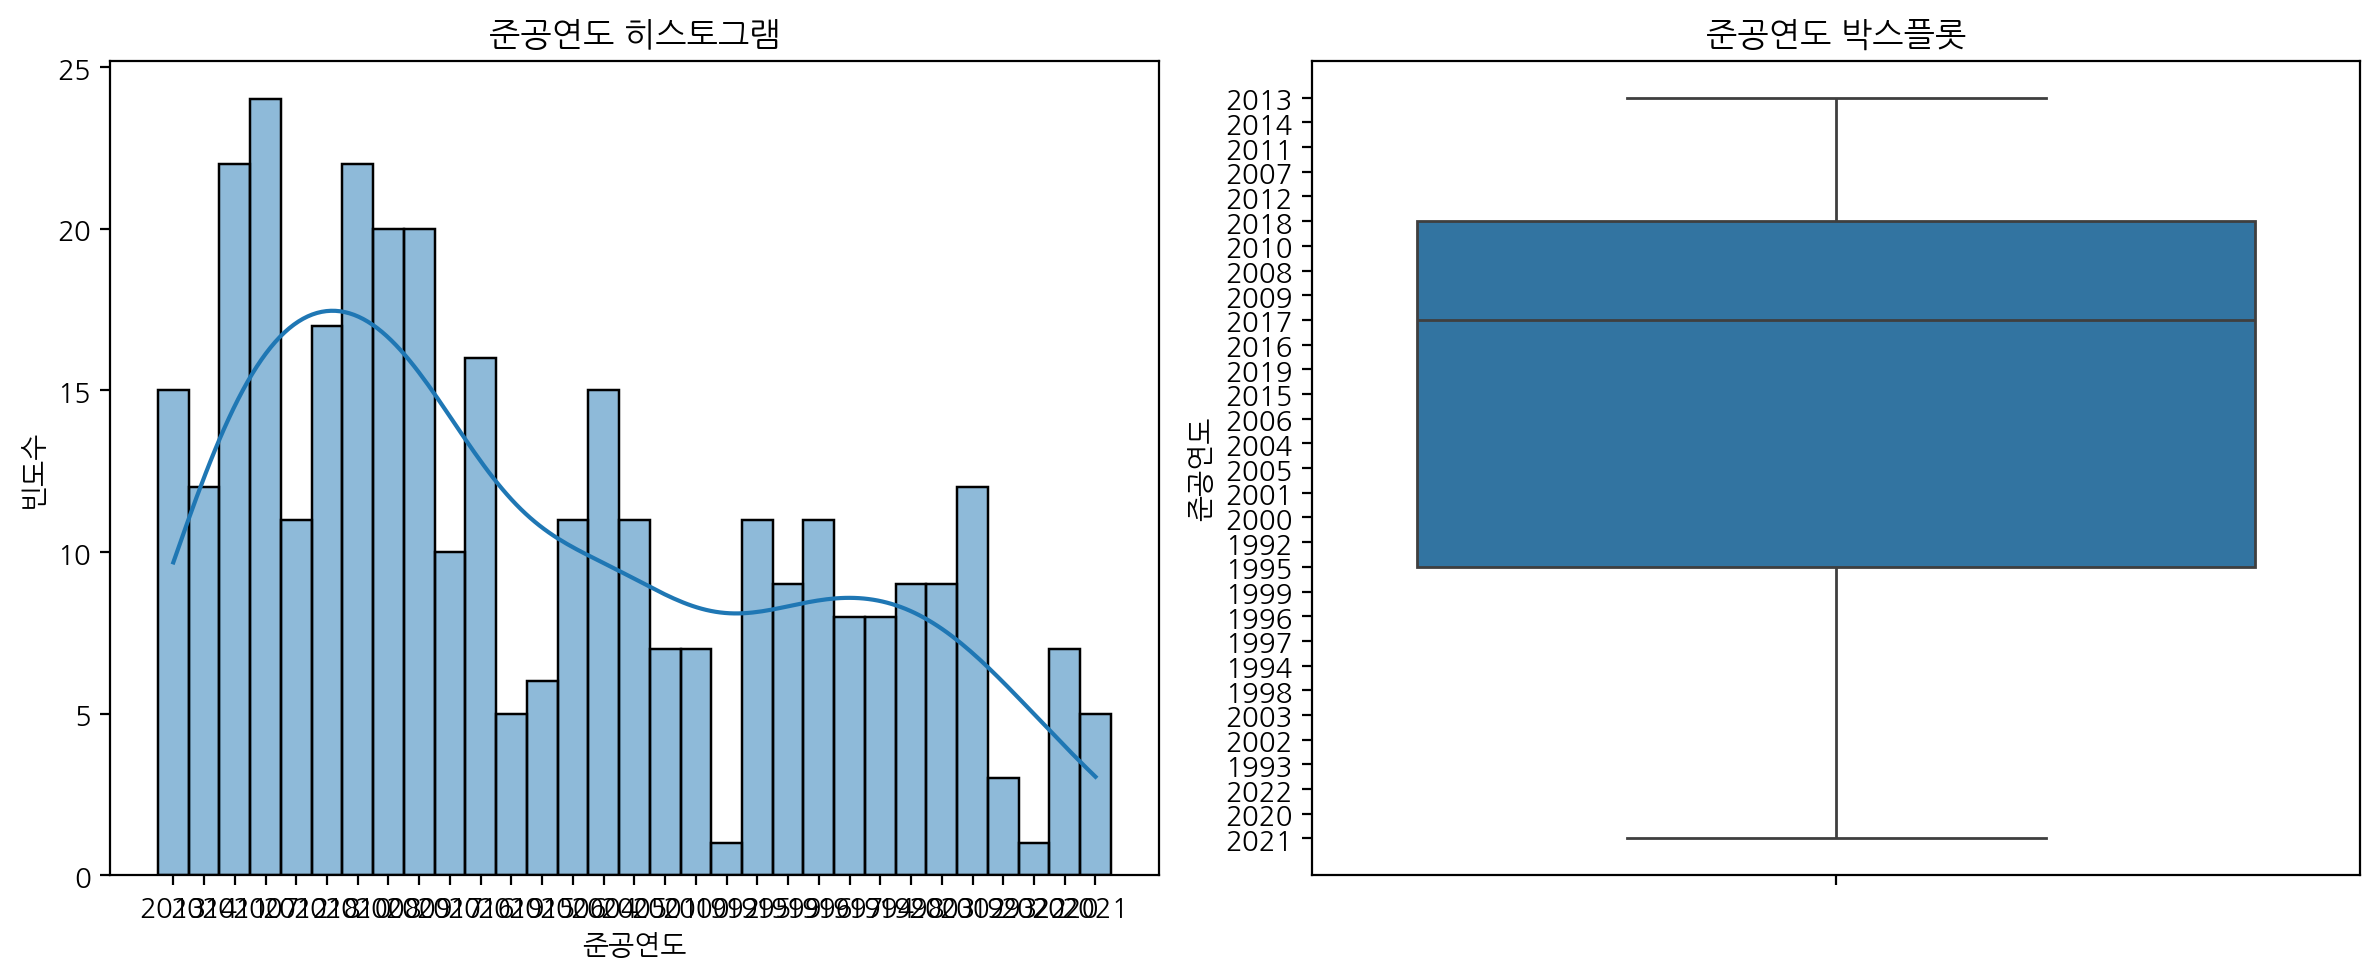

--- 임대료의 기술 통계 ---
count       345.000000
mean     156607.751522
std       80891.515637
min           0.000000
25%      112905.000000
50%      172000.000000
75%      206283.333333
max      386970.000000
Name: 임대료, dtype: float64


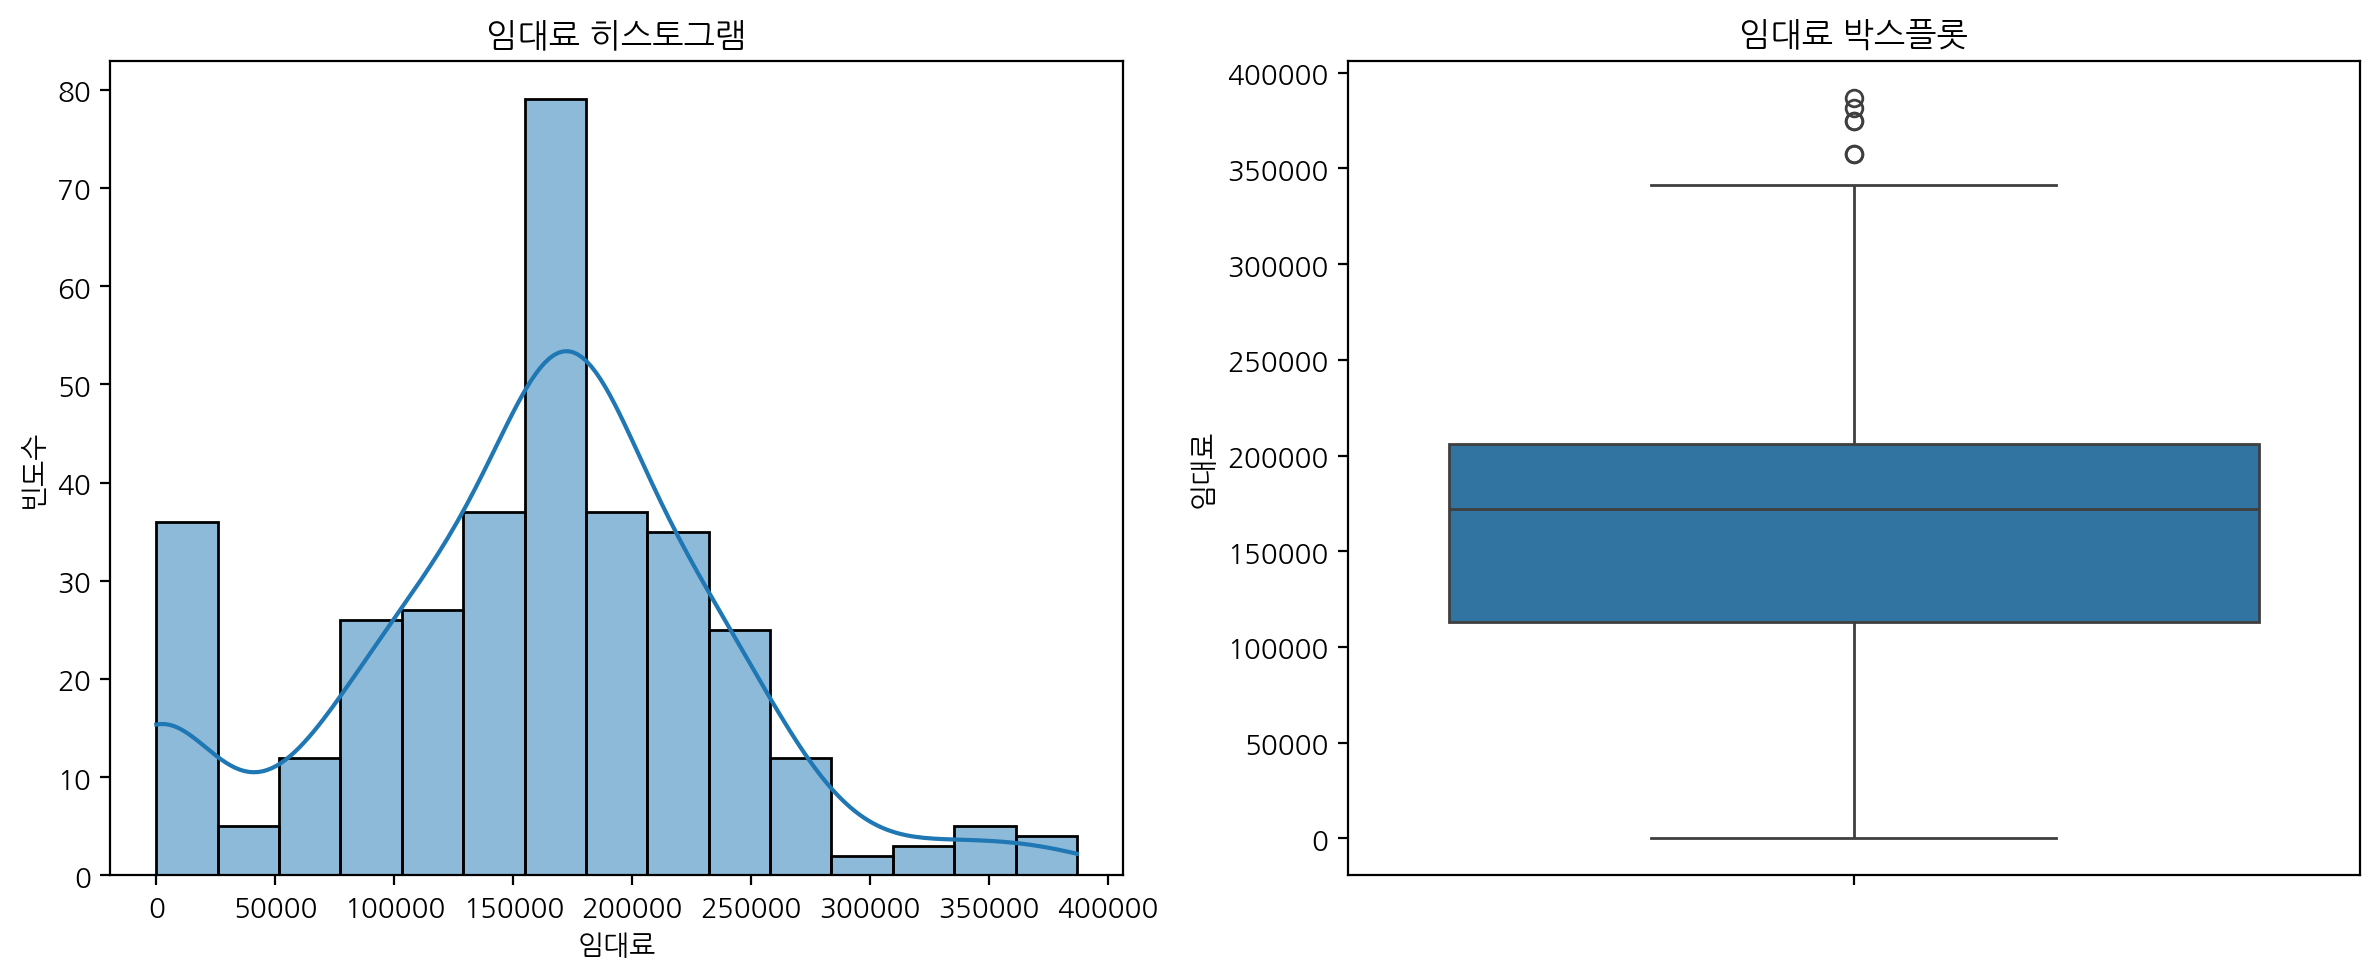

--- 임대보증금의 기술 통계 ---
count    3.450000e+02
mean     1.888465e+07
std      1.084356e+07
min      0.000000e+00
25%      1.272491e+07
50%      1.930850e+07
75%      2.465550e+07
max      5.086029e+07
Name: 임대보증금, dtype: float64


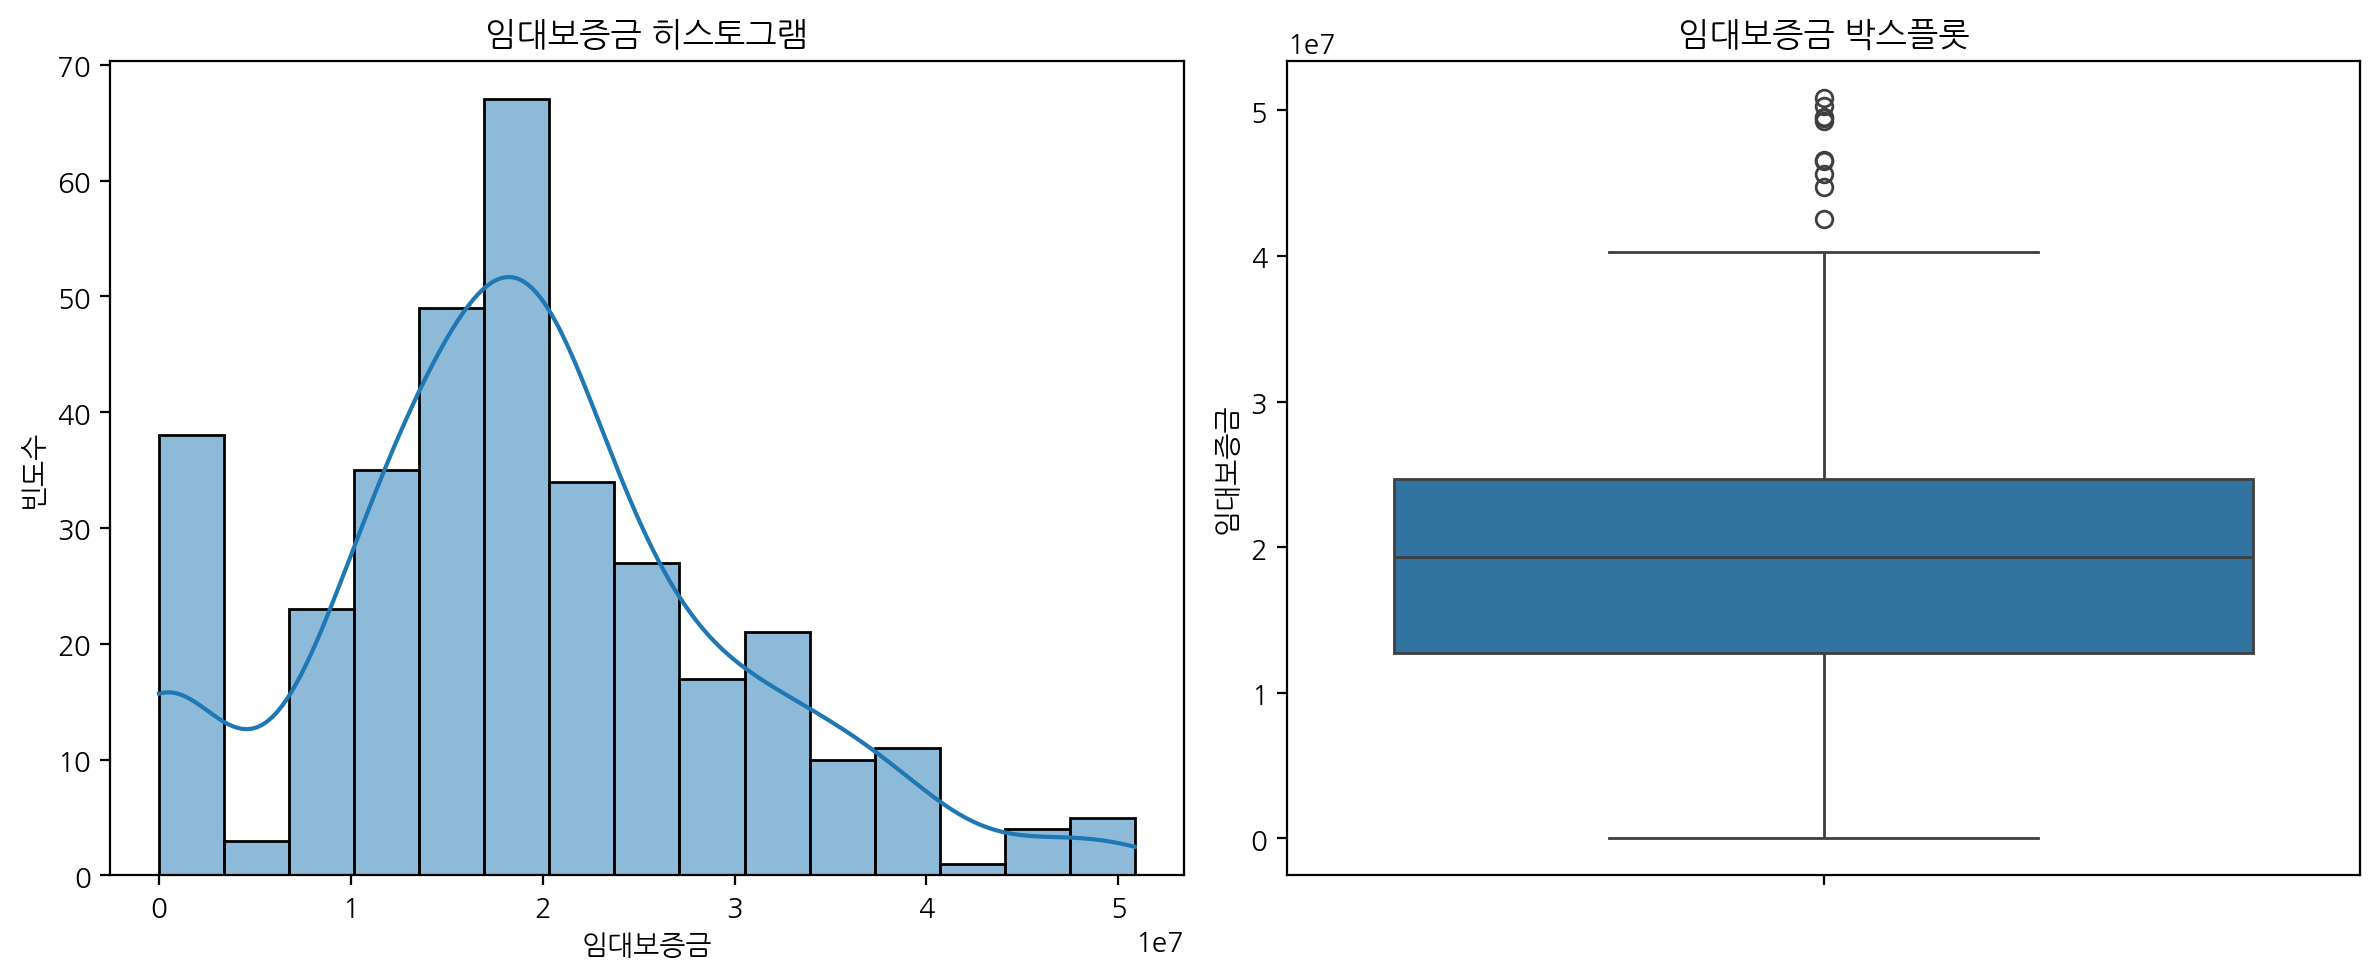

In [389]:
# 함수 만들기
def plot_continuous_variables(dataframe, columns):
    for column in columns:
        # 기술 통계 출력
        print(f"--- {column}의 기술 통계 ---")
        print(dataframe[column].describe())
        
        # 히스토그램
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[column], kde=True)
        plt.title(f'{column} 히스토그램')
        plt.xlabel(column)
        plt.ylabel('빈도수')

        # 박스플롯
        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[column])
        plt.title(f'{column} 박스플롯')
        plt.ylabel(column)

        plt.tight_layout()
        plt.show()

# 분석할 연속형 변수 목록
continuous_columns = ['실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금']

# 함수 호출
plot_continuous_variables(apart, continuous_columns)

## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [395]:
# 파일로 저장
joblib.dump(apart, path+'base_data2_최종본.pkl')

['base_data2_최종본.pkl']